# Plotting with Seaborn and further case studies

Shahryar Noei, based on notebook designed by Marco Chierici

April 16, 2025

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Box plots & Violin plots

### `sns.boxplot()`

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We draw a boxplot of the tip percentage (which we'll compute) for each `day` in the data source.

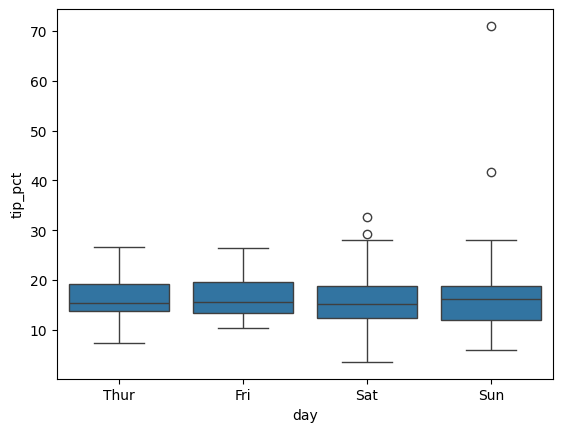

In [3]:
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]

g = sns.boxplot(data=tips, x="day", y="tip_pct")

Customize axis labels via matplotlib methods:

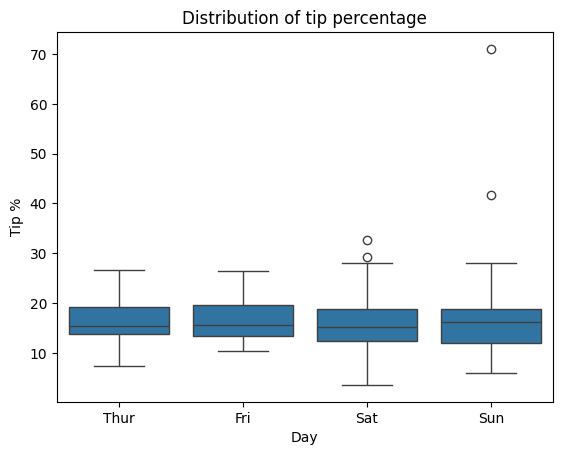

In [4]:
g = sns.boxplot(data=tips, x="day", y="tip_pct")
g.set(xlabel="Day", ylabel="Tip %", title="Distribution of tip percentage");

To customize font sizes, use `set_xlabel`, `set_ylabel`, or `set_title`:

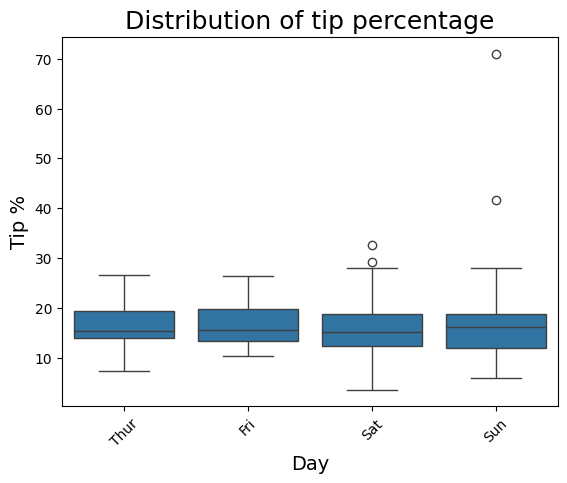

In [5]:
g = sns.boxplot(data=tips, x="day", y="tip_pct")
g.set_xlabel("Day", fontsize=14)
g.set_ylabel("Tip %", fontsize=14)
g.set_title("Distribution of tip percentage", fontsize=18)
plt.xticks(rotation=45)
plt.show()

It's easy to break down by another variable, using `hue`.

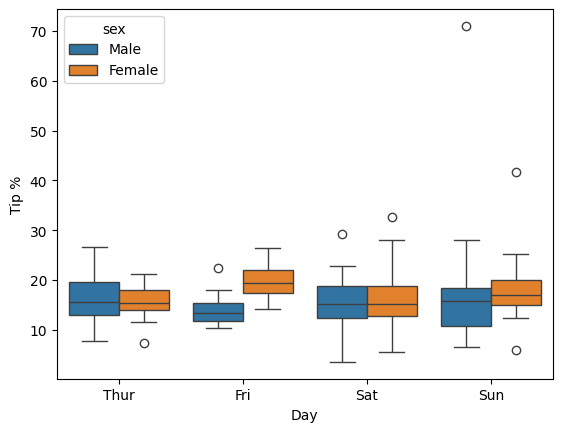

In [6]:
# default palette
g = sns.boxplot(data=tips, x="day", y="tip_pct", hue="sex")
g.set(xlabel="Day", ylabel="Tip %");

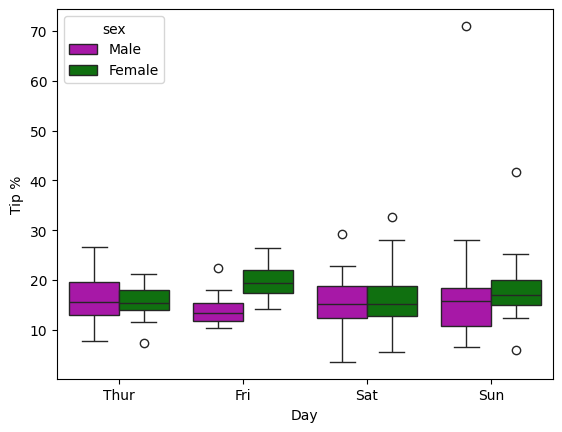

In [7]:
# custom palette
g = sns.boxplot(data=tips, x="day", y="tip_pct", hue="sex", palette=["m", "g"])  # "Set3", "tab20"
g.set(xlabel="Day", ylabel="Tip %");

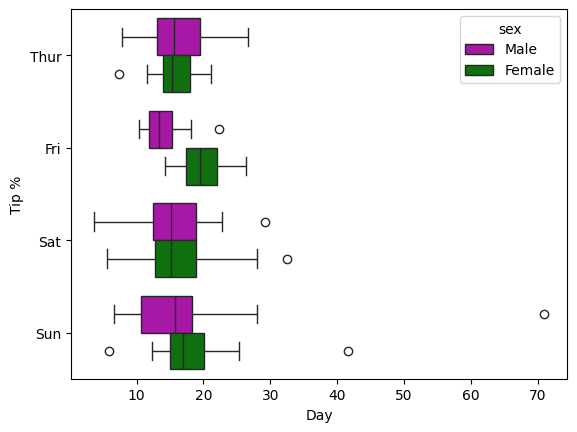

In [8]:
# horizontal version (just swap x & y variables)
g = sns.boxplot(data=tips, y="day", x="tip_pct", hue="sex", palette=["m", "g"])
g.set(xlabel="Day", ylabel="Tip %");

To create different box plots as subpanels of the same figure, create a layout with matplotlib: for example, through `plt.subplots()`. Then, assign each box plot to its axis with the `ax` parameter.

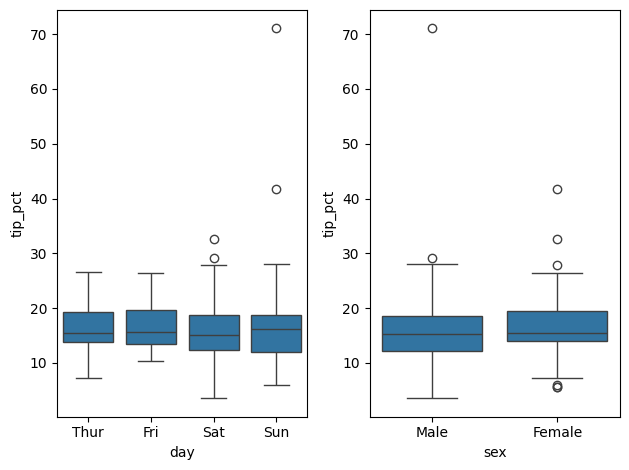

In [9]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(data=tips, x="day", y="tip_pct", ax=ax[0])
sns.boxplot(data=tips, x="sex", y="tip_pct", ax=ax[1])
plt.tight_layout()
plt.show()


It's usually better to also overlay data points. While `sns.boxplot` does not have a dedicated option for this, you can get the same result by adding a *stripplot* or a *swarmplot* on the box plot with seaborn's `stripplot()` / `swarmplot()`:

<Axes: xlabel='sex', ylabel='tip_pct'>

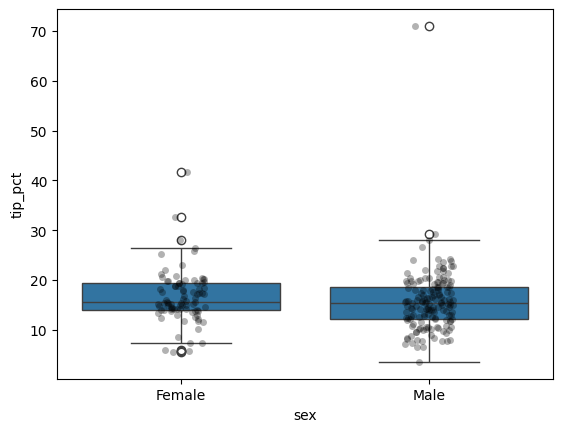

In [10]:
sns.boxplot(data=tips, x="sex", y="tip_pct", order=["Female", "Male"])
sns.stripplot(
    data=tips, x="sex", y="tip_pct", order=["Female", "Male"], color="black", alpha= 0.3
)

If you have data grouped by `hue`:

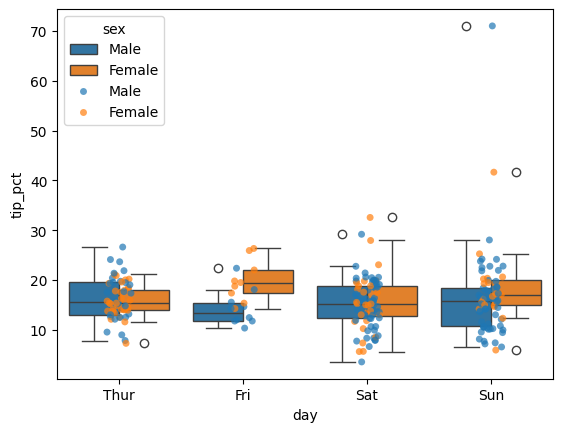

In [11]:
sns.boxplot(data=tips, x="day", y="tip_pct", hue="sex")
sns.stripplot(data=tips, x="day", y="tip_pct", hue="sex", alpha=0.7)
plt.show()

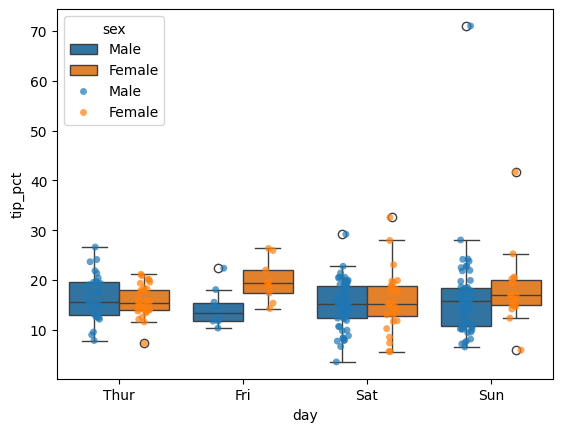

In [12]:
sns.boxplot(data=tips, x="day", y="tip_pct", hue="sex")
sns.stripplot(data=tips, x="day", y="tip_pct", hue="sex", dodge=True, alpha=0.7)
plt.show()

Make the points stand out over the boxes:

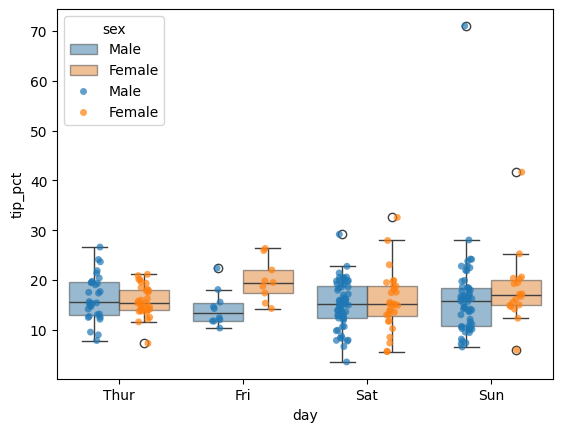

In [13]:
# dictionary of box properties
boxprops = {"alpha": 0.5}

sns.boxplot(data=tips, x="day", y="tip_pct", hue="sex", boxprops=boxprops)
sns.stripplot(data=tips, x="day", y="tip_pct", hue="sex", dodge=True, alpha=0.7)
plt.show()

Also remove the redundant legend for the swarmplot:

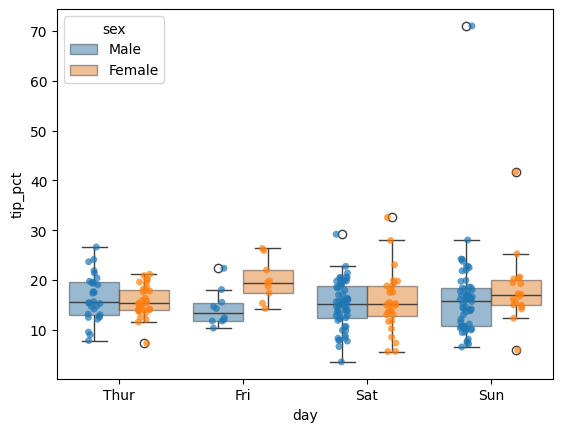

In [14]:
sns.boxplot(data=tips, x="day", y="tip_pct", hue="sex", boxprops=boxprops)
sns.stripplot(data=tips, x="day", y="tip_pct", hue="sex", dodge=True, alpha=0.7, legend=False)
plt.show()

### `sns.violinplot()`

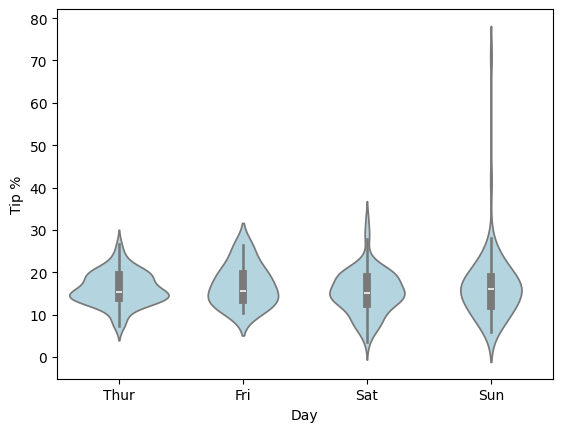

In [15]:
g = sns.violinplot(data=tips, x="day", y="tip_pct", color="lightblue")
g.set(xlabel="Day", ylabel="Tip %");

Change what is drawn inside the violins with the parameter `inner`:

- `"box"` (default): draw a miniature box-and-whisker plot
- `"quart"`: show the quartiles of the data
- `"point"` or `"stick"`: show each observation

<Axes: xlabel='day', ylabel='tip_pct'>

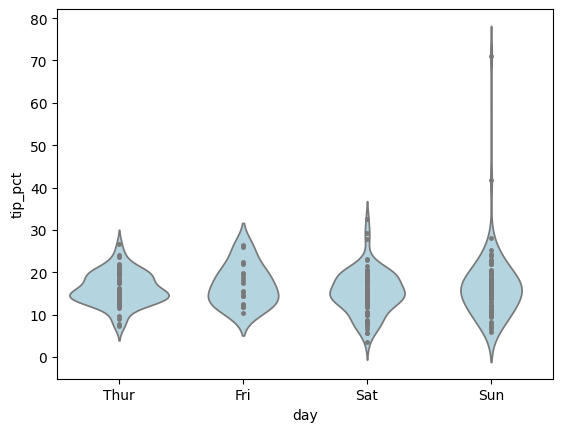

In [16]:
sns.violinplot(data=tips, x="day", y="tip_pct", color="lightblue", inner="point")

To have the points jittered, you have to overlay a stripplot, like we did above with the box plots.

<Axes: xlabel='day', ylabel='tip_pct'>

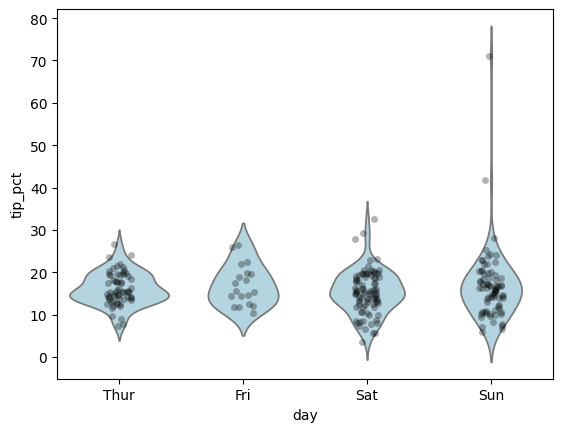

In [17]:
sns.violinplot(data=tips, x="day", y="tip_pct", color="lightblue", inner=None)
sns.stripplot(data=tips, x="day", y="tip_pct", color="black", alpha=0.3, jitter=True)

You can customize violin plots (axis labels, hue) just like you would do with box plots. However, violin plots support to split violin in halves, when you use the `hue` parameter.

<Axes: xlabel='day', ylabel='tip_pct'>

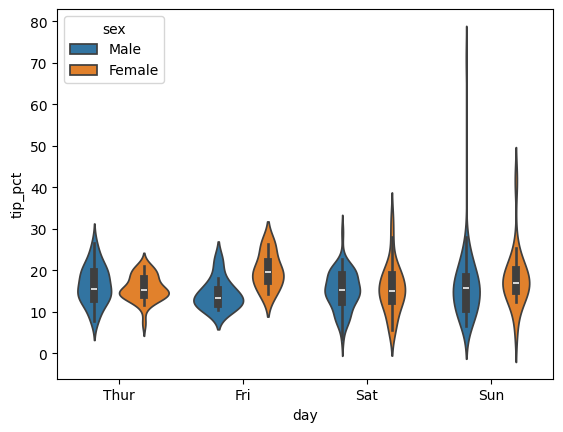

In [18]:
# regular hue
sns.violinplot(data=tips, x="day", y="tip_pct", hue="sex")

<Axes: xlabel='day', ylabel='tip_pct'>

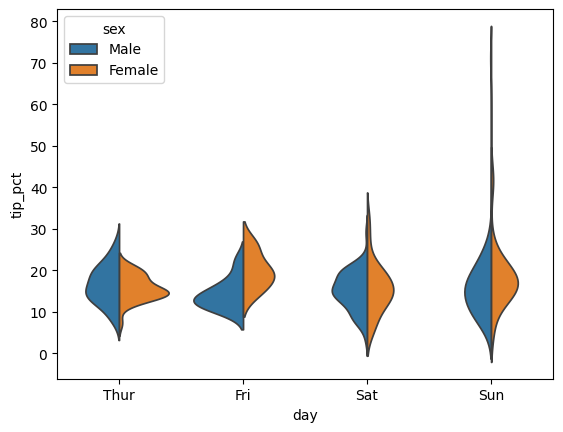

In [19]:
# split hue
sns.violinplot(data=tips, x="day", y="tip_pct", hue="sex", split=True, inner=None)

### `sns.catplot()`

This approach allows for more flexibility.

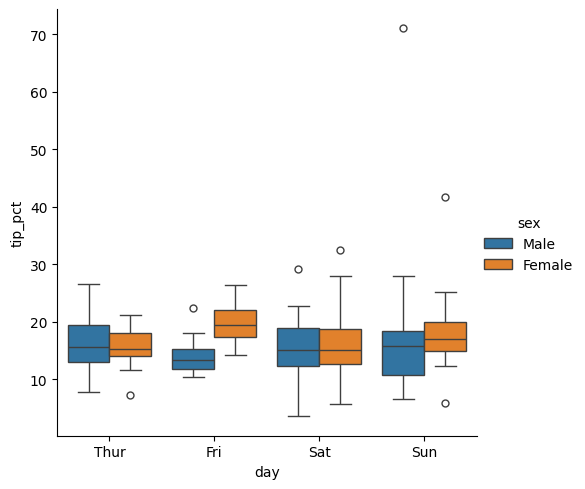

In [20]:
sns.catplot(data=tips, kind="box", x="day", y="tip_pct", hue="sex");

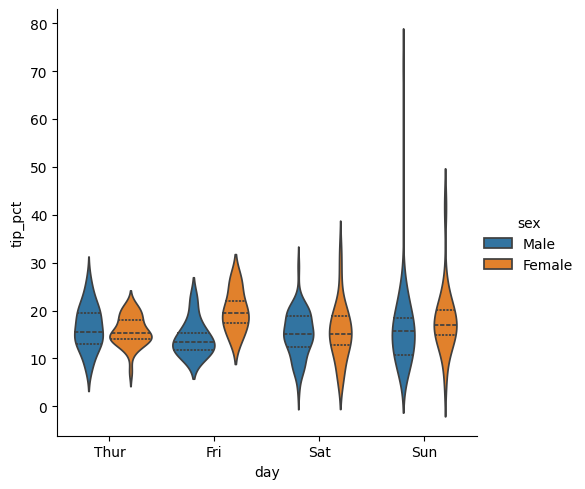

In [21]:
sns.catplot(data=tips, kind="violin", x="day", y="tip_pct", hue="sex", inner="quartile");

The function `catplot()` can also be used to generate categorical estimate plots such as bar or count plots (`kind="count"`).

We see here an example that visualizes the counts distribution of RMS Titanic survivors in relation to the passengers deck.

In [22]:
# Load Titanic Dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


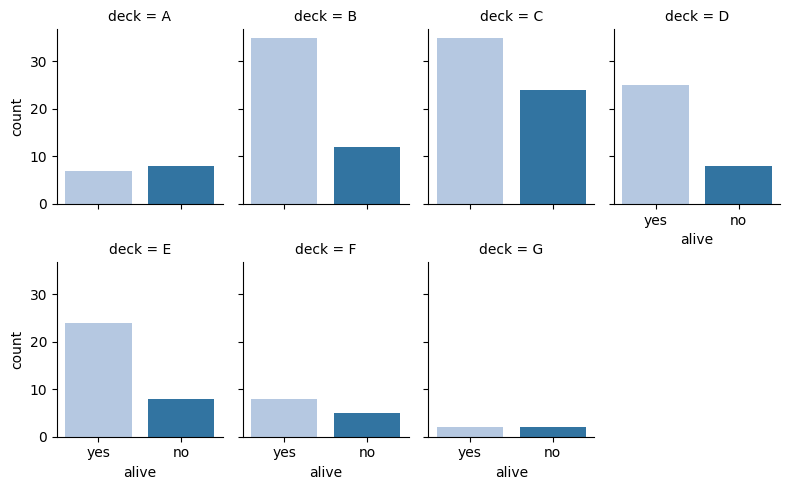

In [23]:
sns.catplot(
    x="alive",
    col="deck",
    col_wrap=4,
    data=titanic,
    kind="count",
    hue="alive",
    order=["yes", "no"],  # override the default order
    height=2.5,
    aspect=0.8,
    palette="tab20",
)

plt.show()

Another example on the Titanic dataset: this time we use `catplot` to show violin plots of passenger ages, grouped by the town where they embarked.

We also pass additional keyword arguments to the plot function (in this case, `violinplot`):

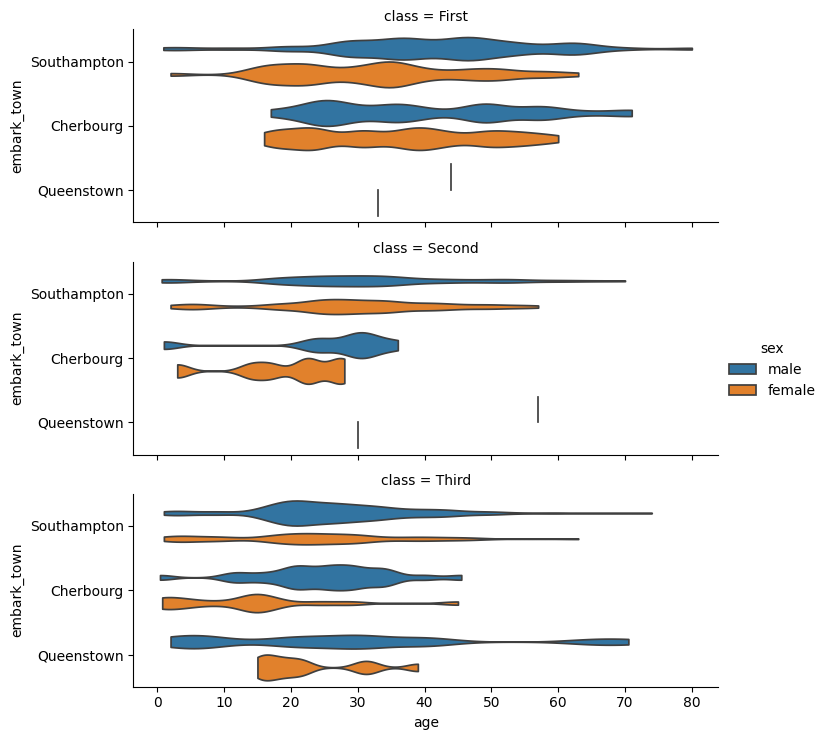

In [24]:
sns.catplot(
    x="age",
    y="embark_town",
    hue="sex",
    col="class",
    data=titanic,
    col_wrap=1,
    height=2.5,
    aspect=3,
    palette="tab10",
    kind="violin",
    inner=None,
    dodge=True,
    cut=0,  # limit the violin range within the range of the observed data
    bw_method=0.2,  # scale factor to use when computing the kernel bandwidth
)

plt.show()

## Bar plots

Bar plots are drawn with `sns.barplot`, where you can group by a categorical variable and plot aggregated values with automatic confidence intervals:

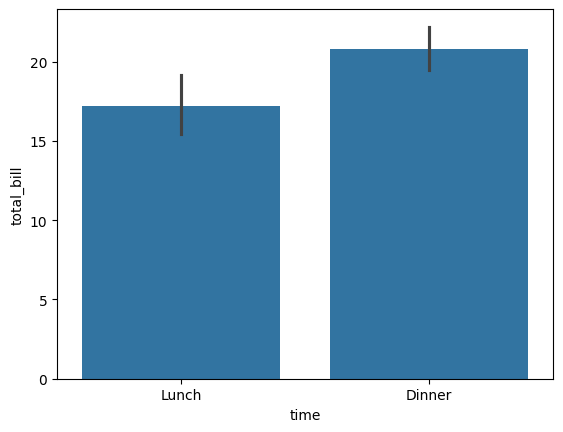

In [25]:
sns.barplot(data=tips, x="time", y="total_bill");

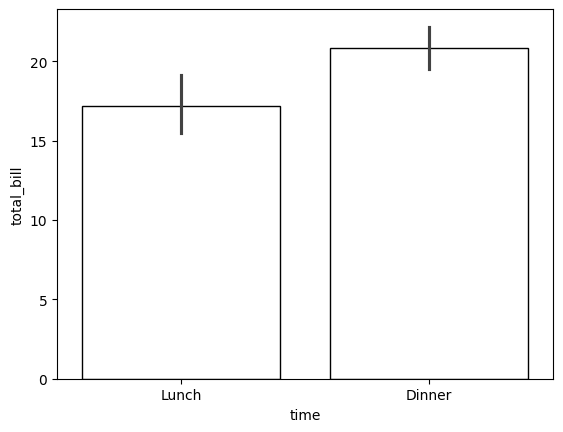

In [26]:
sns.barplot(data=tips, x="time", y="total_bill", facecolor="white", edgecolor="black");

You can also visualize less minimalistic bars, i.e., with caps, using the `capsize` and `capthick` parameters.

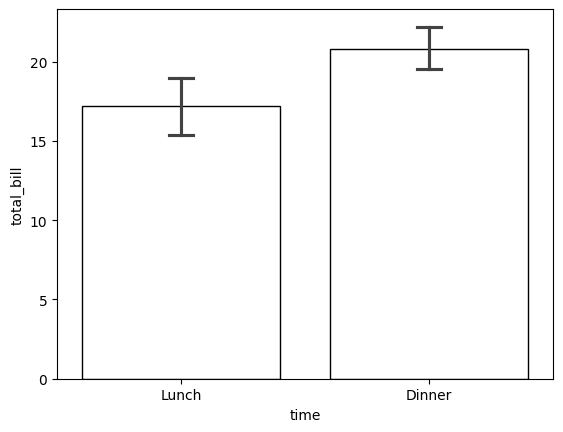

In [27]:
sns.barplot(data=tips, x="time", y="total_bill", facecolor="white", edgecolor="black", capsize=0.1);

A second grouping layer can be added with `hue`:

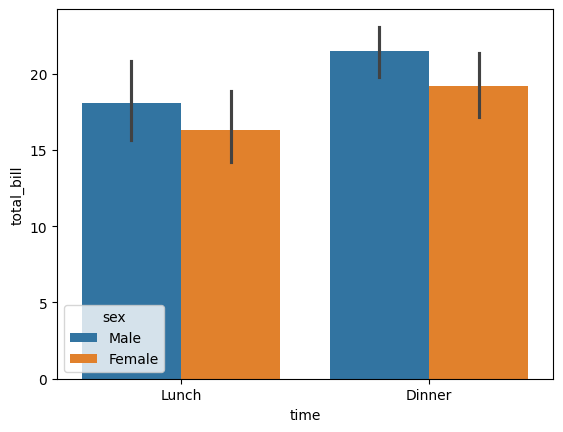

In [28]:
sns.barplot(data=tips, x="time", y="total_bill", hue="sex");

The `errorbar` argument can be used to show standard deviation instead of confidence intervals:

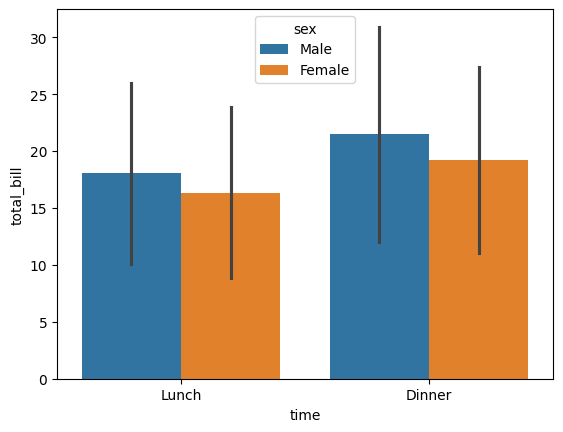

In [29]:
sns.barplot(data=tips, x="time", y="total_bill", hue="sex", errorbar="sd");

Horizontal bar plots are drawn simply swapping the `x` and `y` arguments:

<Axes: xlabel='total_bill', ylabel='time'>

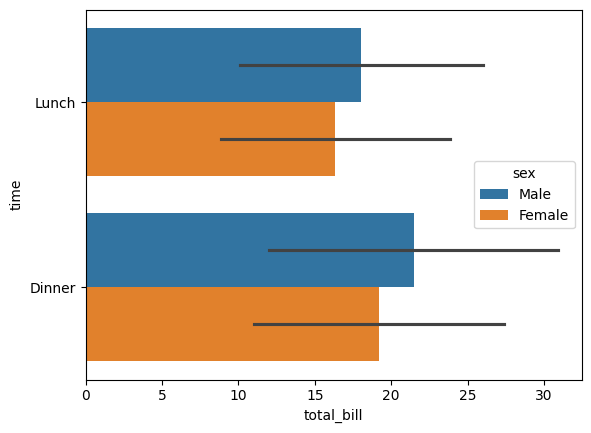

In [30]:
sns.barplot(data=tips, y="time", x="total_bill", hue="sex", errorbar="sd")

## Scatter plots

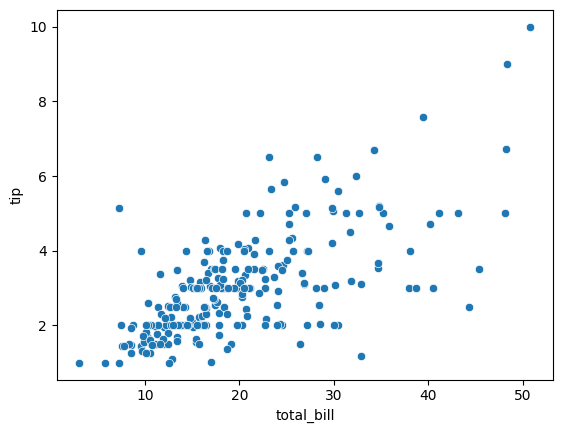

In [31]:
sns.scatterplot(tips, x="total_bill", y="tip");

The `hue` and `size` parameters allow to show up to four variables in a 2D scatterplot.

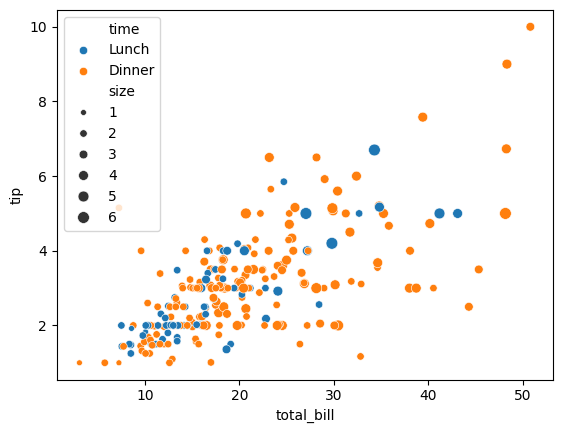

In [32]:
sns.scatterplot(tips, x="total_bill", y="tip", hue="time", size="size");

Seaborn supports statistical estimation, for example of linear regression lines:

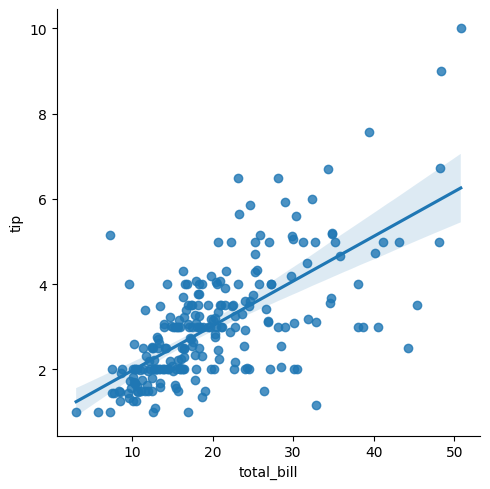

In [33]:
sns.lmplot(tips, x="total_bill", y="tip");

Stratification by a third variable is supported, as usual, by the argument `hue`:

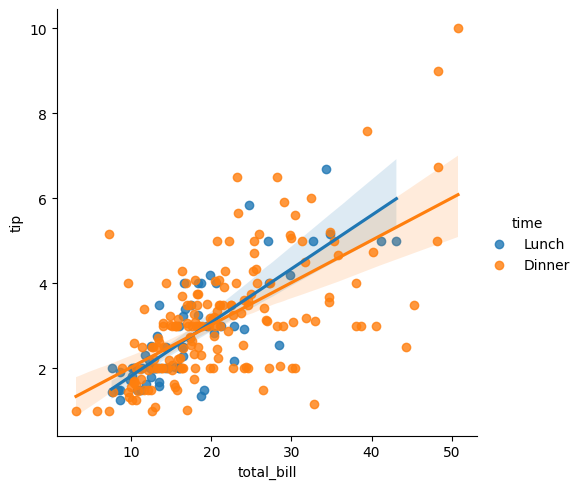

In [34]:
sns.lmplot(tips, x="total_bill", y="tip", hue="time");

You can also have one plot for each level of the variable passed to `hue`.

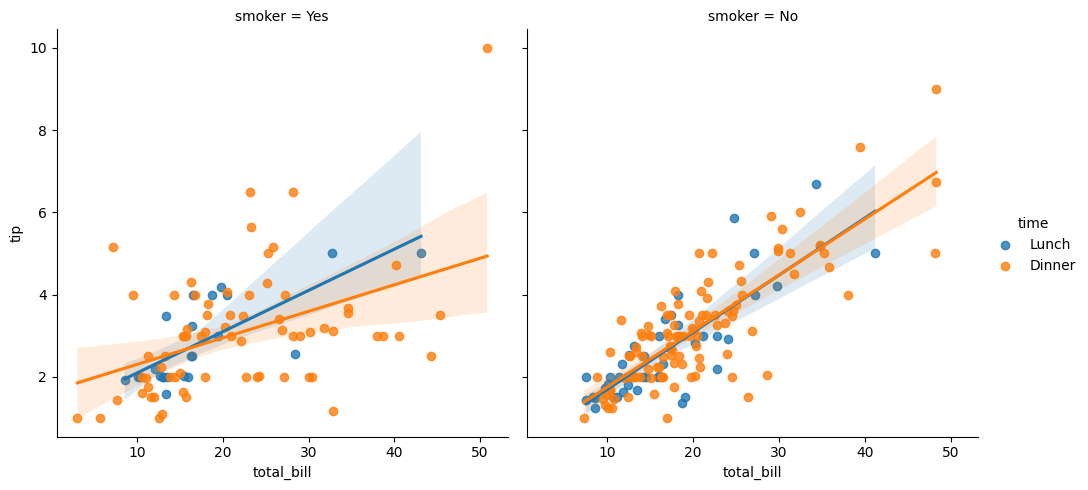

In [35]:
sns.lmplot(tips, x="total_bill", y="tip", hue="time", col="smoker");

## Faceted plots

Above we saw examples of *faceted* plots. Facets are subplots of a bigger figure that show specific subgroups of the whole data set. Although a few plotting functions can generate faceted plots, Seaborn also supports a general way to create them.

Suppose we want to draw histograms of the tip percentage broken down by both `time` and `sex`. We use seaborn's `FacetGrid()`.

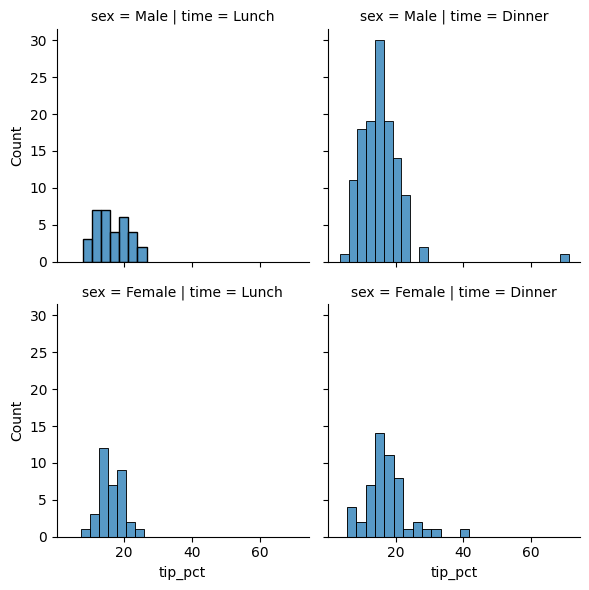

In [36]:
grid = sns.FacetGrid(tips, row="sex", col="time")
grid.map(sns.histplot, "tip_pct");

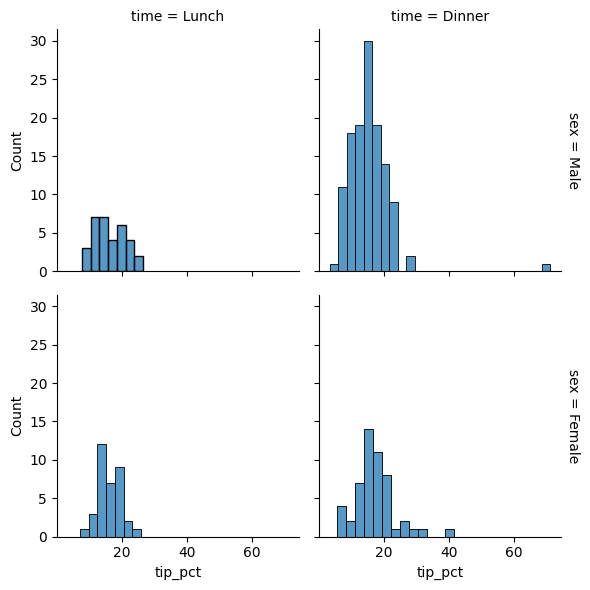

In [37]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)  # margin_titles may not work in all situations
grid.map_dataframe(sns.histplot, x="tip_pct");

This time I used `map_dataframe`, which acts like `map` but is made for plotting with functions that accept a long-form DataFrame as a `data` keyword argument and access the
data in that DataFrame using string variable names (`x="tip_pct"`)

### Exercise

Following the above examples, plot:

1. two scatterplots in one row, showing `tip` vs. `total_bill` faceted by `sex` (on the columns), and colored by `smoker`

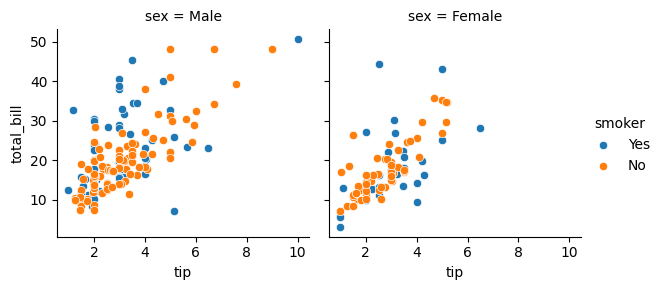

In [38]:
grid = sns.FacetGrid(tips, col="sex", hue="smoker")
grid.map_dataframe(sns.scatterplot, x="tip", y="total_bill")
grid.add_legend()

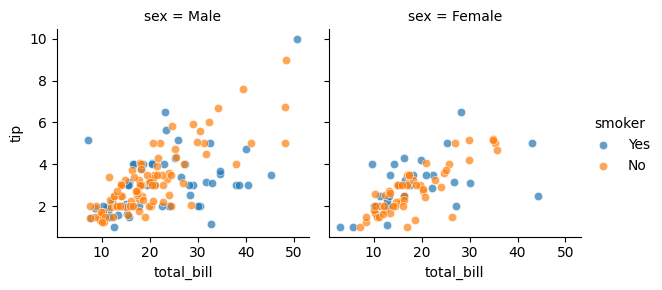

In [39]:
grid = sns.FacetGrid(tips, col="sex", hue="smoker")
grid.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
grid.add_legend()
plt.show()

2. four barplots (`sns.barplot()`) in one row, showing `total_bill` by `sex`, faceted by `day` (on the columns)

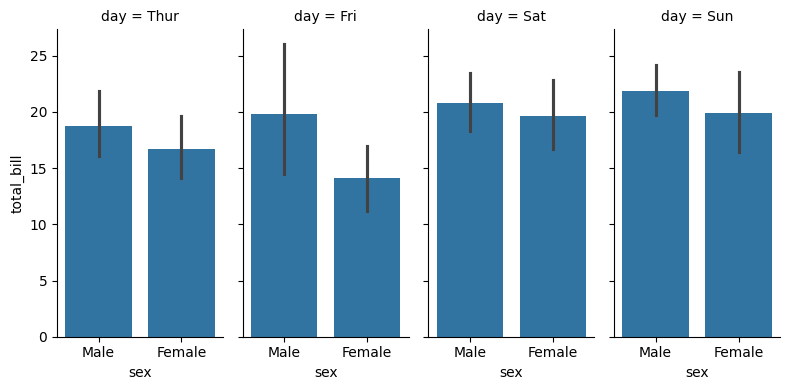

In [40]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])
plt.show()

---

To adjust some aspects of the `FacetGrid` after we're done with the plotting, we can use `FacetGrid`'s `set()` and `set_axis_labels()` methods:

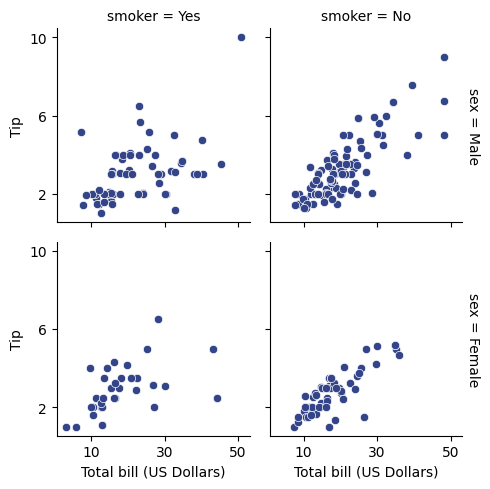

In [41]:
g = sns.FacetGrid(tips, row="sex", col="smoker", height=2.5, margin_titles=True) 
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")

g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])

plt.show()

For additional customization, you can work directly with the underlying matplotlib's `Figure` and `Axes` objects: they are stored as member attributes of the `FacetGrid` object at `figure` and `axes_dict`, respectively. When making a figure without row or column faceting, you can also use the `ax` attribute to directly access the single axes.

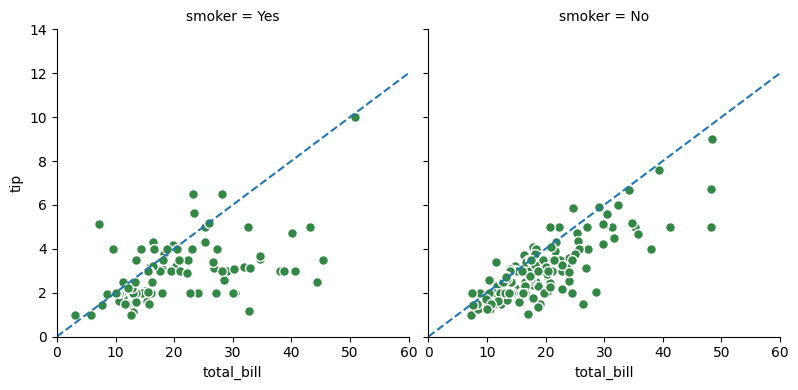

In [42]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)

for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, ls="--")

g.set(xlim=(0, 60), ylim=(0, 14))

plt.show()

## Heatmaps

<Axes: >

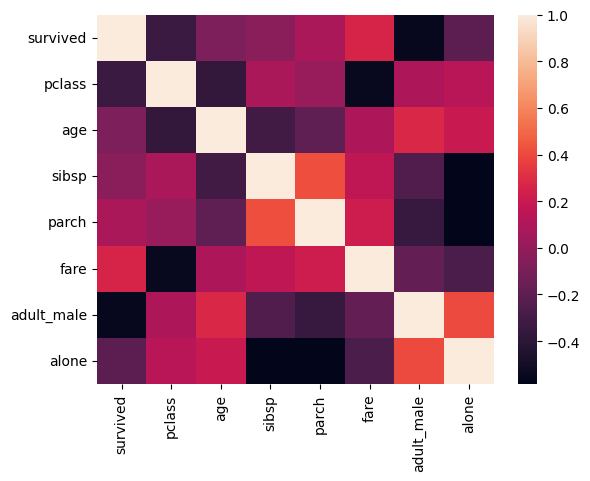

In [43]:
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr)

<Axes: >

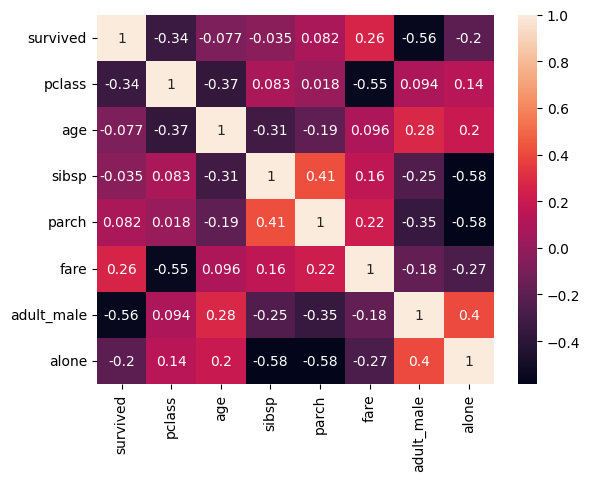

In [44]:
sns.heatmap(corr, annot=True)

<Axes: >

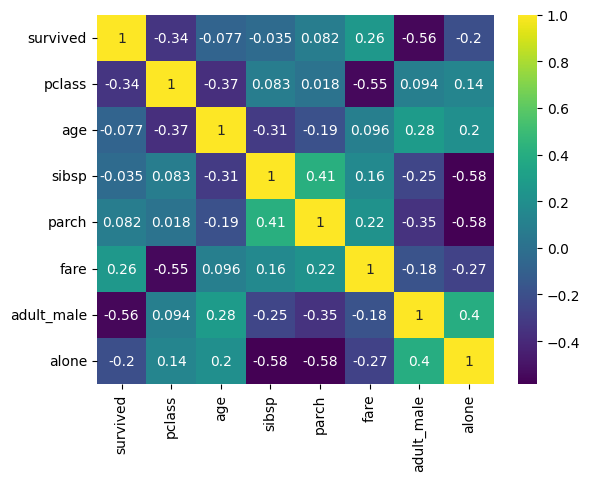

In [45]:
# would this be a good choice for a color palette?
sns.heatmap(corr, annot=True, cmap="viridis")

<Axes: >

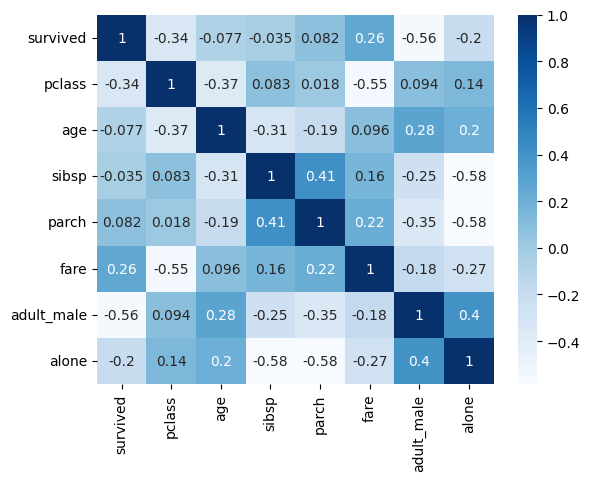

In [46]:
# would this be a good choice for a color palette?
sns.heatmap(corr, annot=True, cmap="Blues")

<Axes: >

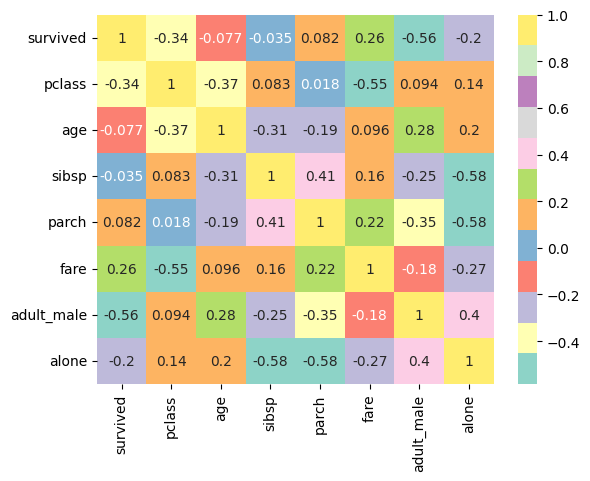

In [47]:
# would this be a good choice for a color palette?
sns.heatmap(corr, annot=True, cmap="Set3")

<Axes: >

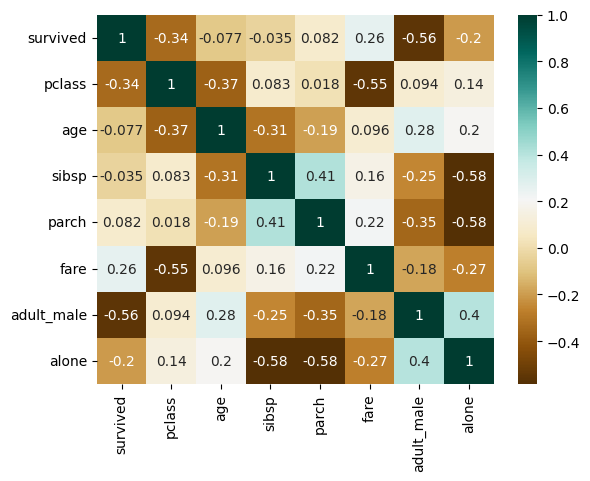

In [48]:
# would this be a good choice for a color palette?
sns.heatmap(corr, annot=True, cmap="BrBG")

Improved aspect ratio:

<Axes: >

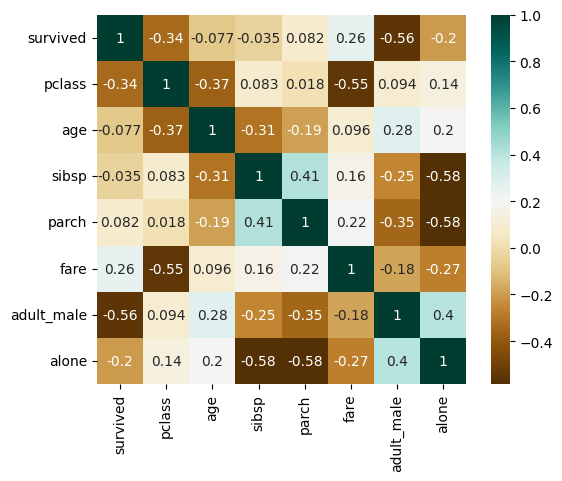

In [49]:
sns.heatmap(corr, annot=True, cmap="BrBG", square=True)

Improved input range:

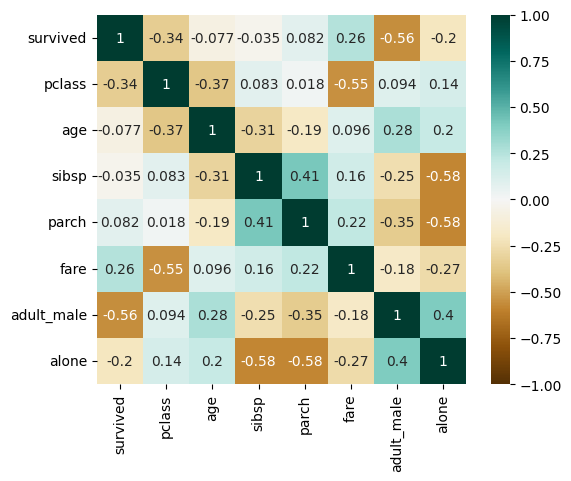

In [50]:
sns.heatmap(corr, annot=True, cmap="BrBG", square=True, vmin=-1, vmax=1)
plt.show()

If you are interested in plotting a diagonal correlogram, you can leverage the argument `mask` of `sns.heatmap()`, which accepts a boolean array specifiyng which cells should be hidden from the visualization. For example, you may want to hide the upper triangular portion of `corr`:

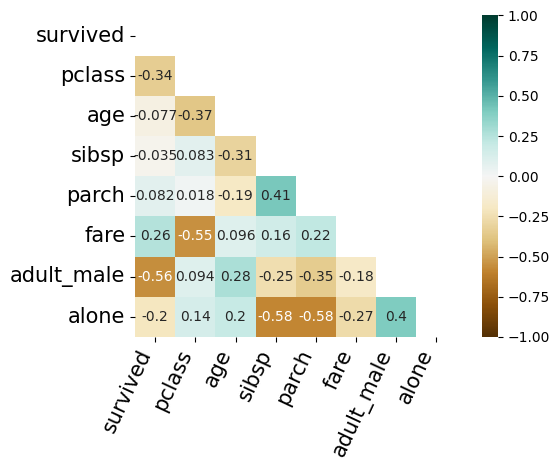

In [51]:
# create a mask for the upper triangular portion of corr
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, cmap="BrBG", square=True, vmin=-1, vmax=1, mask=mask)

# optional:
plt.xticks(rotation=65, ha='right', fontsize=15)
plt.yticks(rotation=0, va='center', fontsize=15)

plt.tight_layout()
plt.show()

Heatmaps are the usual choice to plot correlation between numerical variables. But you can also use them to display the counts of a variable broken down another variable.

In [52]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [53]:
flights_pt = flights.pivot_table(
    values="passengers", index="month", columns="year", observed=False
)

# values -> the column to aggregate
# index -> will become the rows in the pivot table
# columns -> use these input columns to create new columns in the pivot table

flights_pt.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


<Axes: xlabel='year', ylabel='month'>

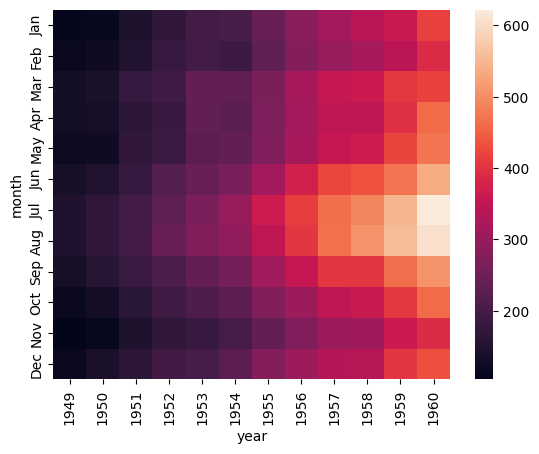

In [54]:
sns.heatmap(flights_pt)

<Axes: xlabel='year', ylabel='month'>

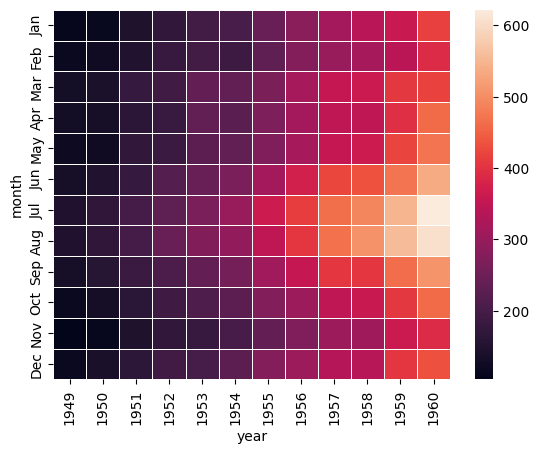

In [55]:
sns.heatmap(flights_pt, linecolor="white", linewidth=0.5)

## Cluster maps

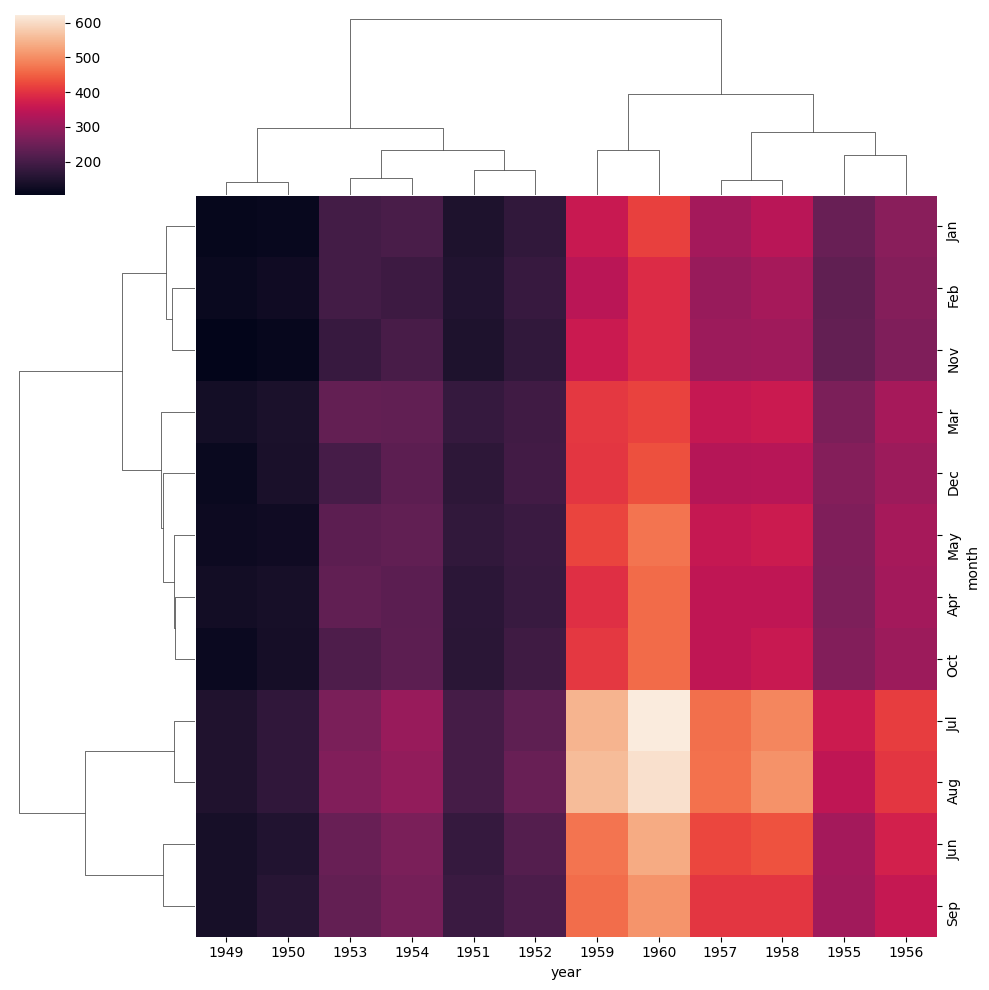

In [56]:
sns.clustermap(flights_pt)

If the input data is already tidy (remember?), like our `flights` dataframe, `clustermap` can pivot it to make it rectangular: in this case, we pass a dictionary of parameters for `pivot_table()` through the `pivot_kws` parameter.

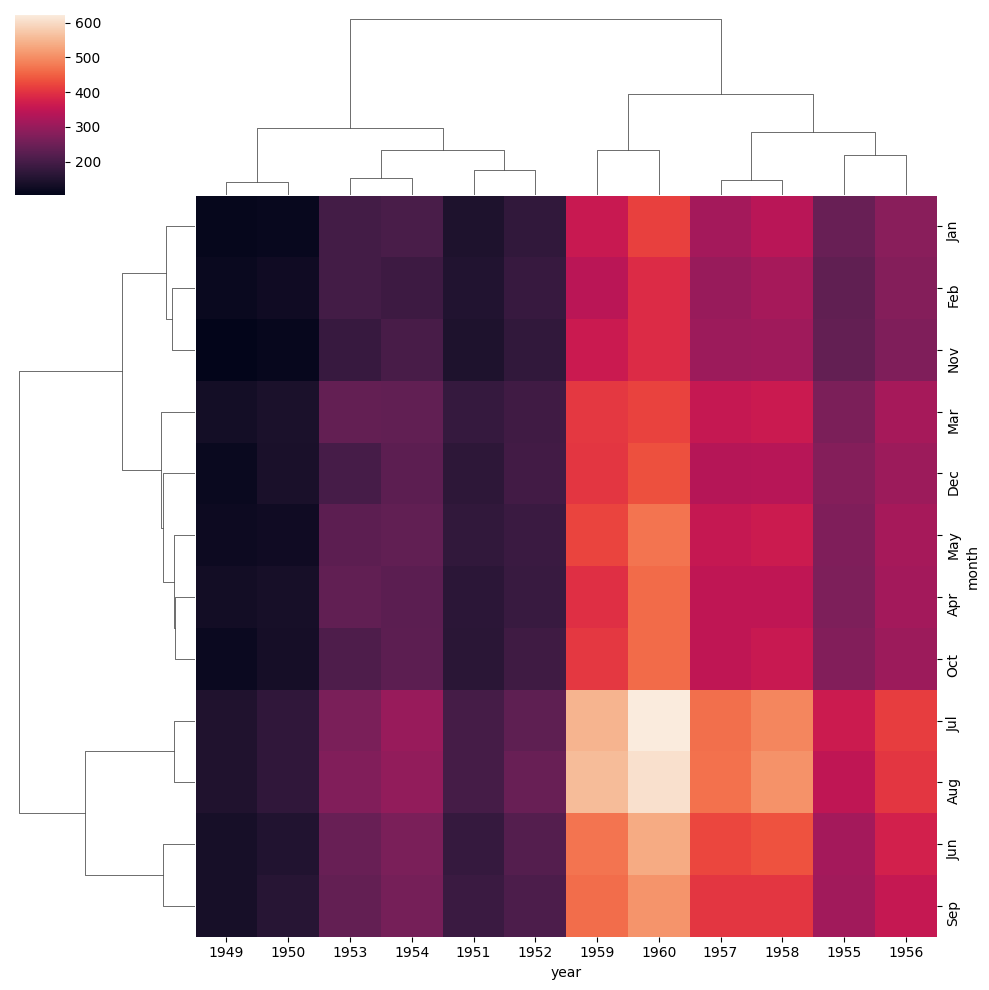

In [57]:
sns.clustermap(flights, pivot_kws=dict(values="passengers", index="month", columns="year"))

## Grid layouts

We already explored seaborn's `pairplot()`, which creates scatterplot matrices by default.

In [58]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


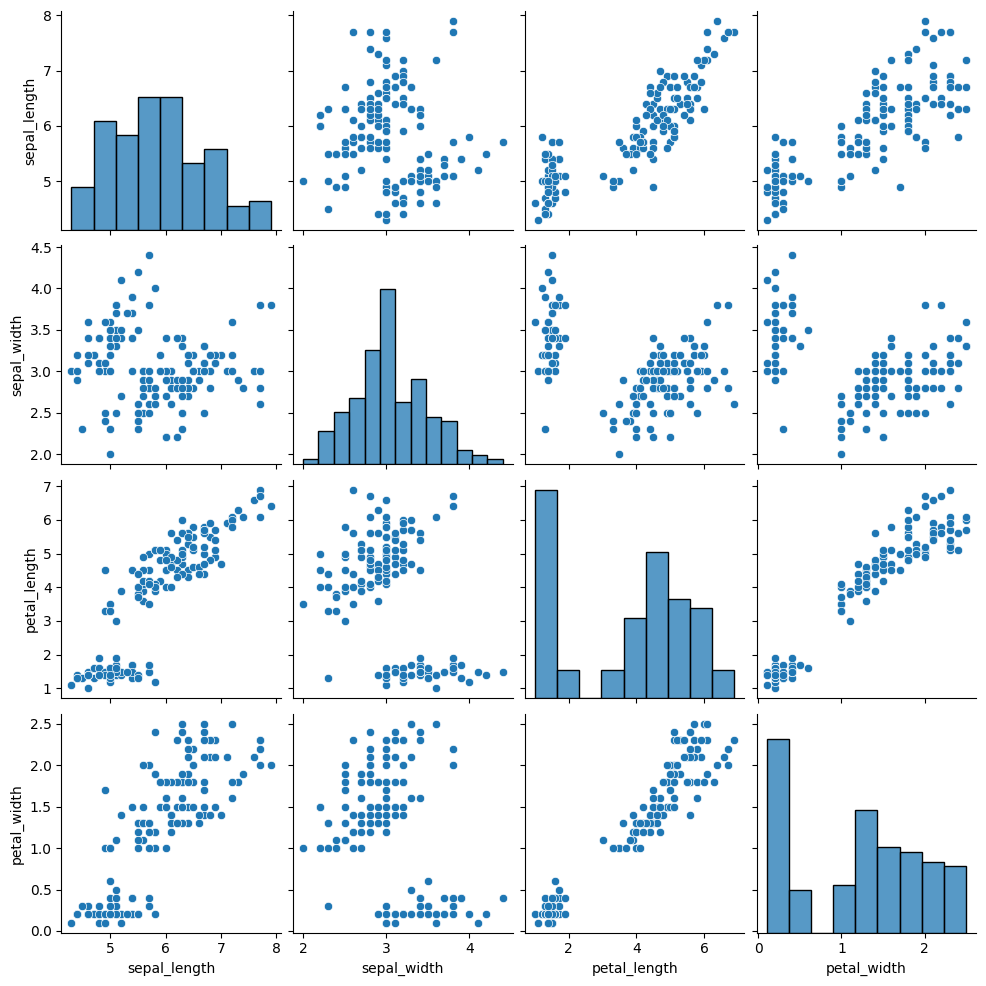

In [59]:
sns.pairplot(iris)

We'll see now a more flexible usage with `sns.PairGrid()`.

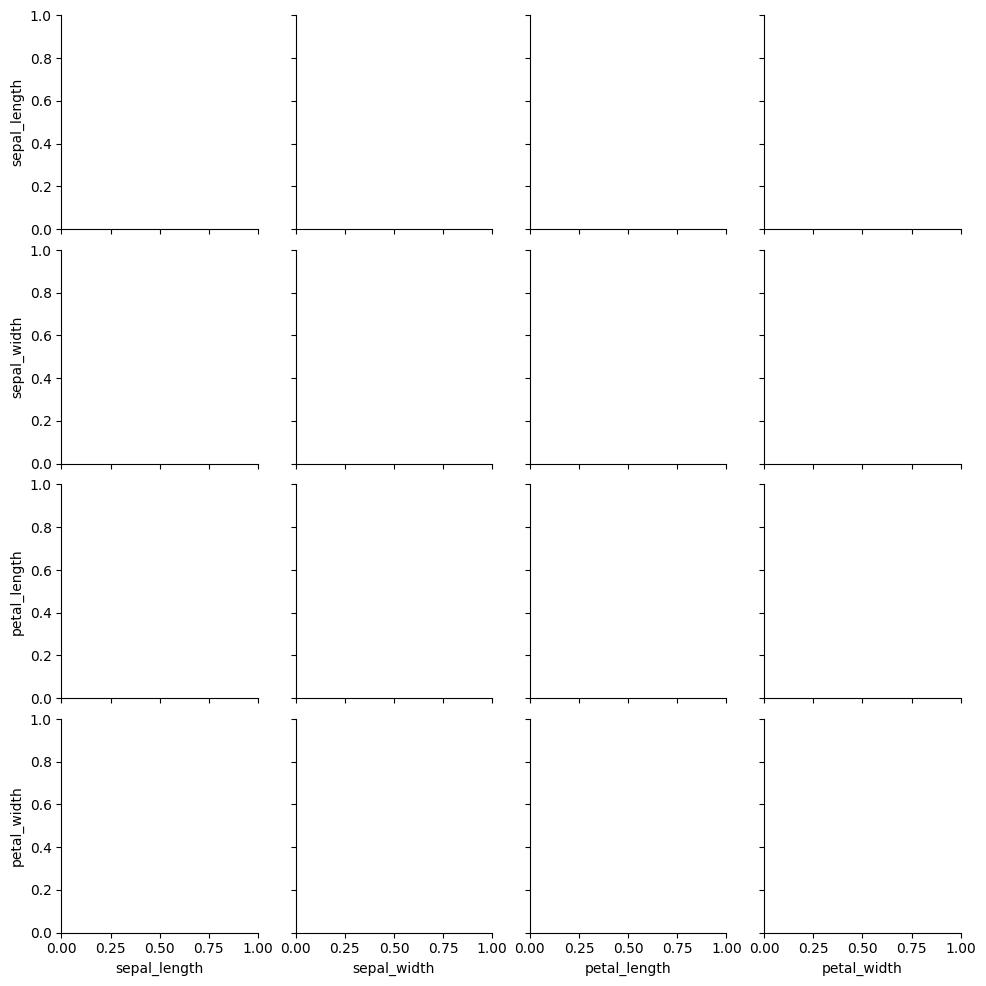

In [60]:
sns.PairGrid(iris)

We initially get a plot with some sort of placeholders for all the features in the dataset.

Now we can *map* plot functions to the empty grids. For example, let's create scatterplots.

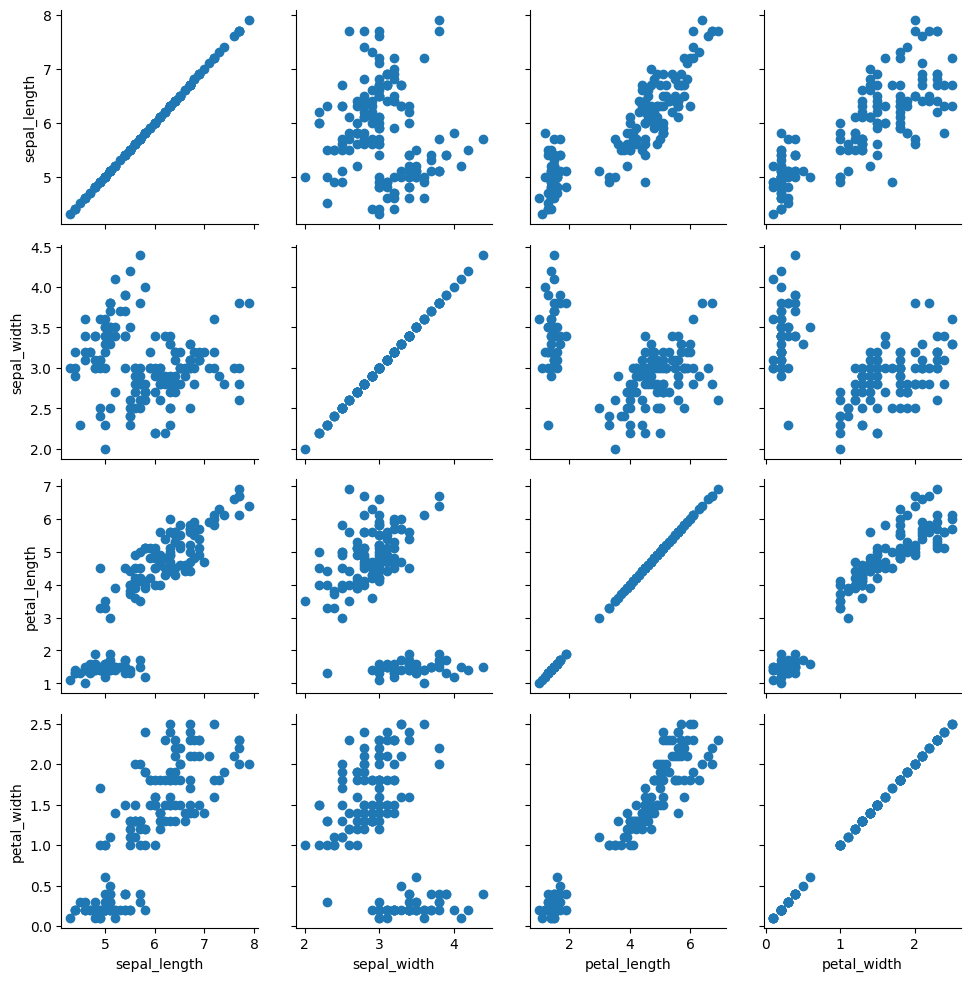

In [61]:
grids = sns.PairGrid(iris)
grids.map(plt.scatter)

We have a scatterplot for *all* grids, even on the diagonal: not really great. Luckily, we can use the `map_diag`, `map_upper`, and `map_lower` methods for more flexibility.

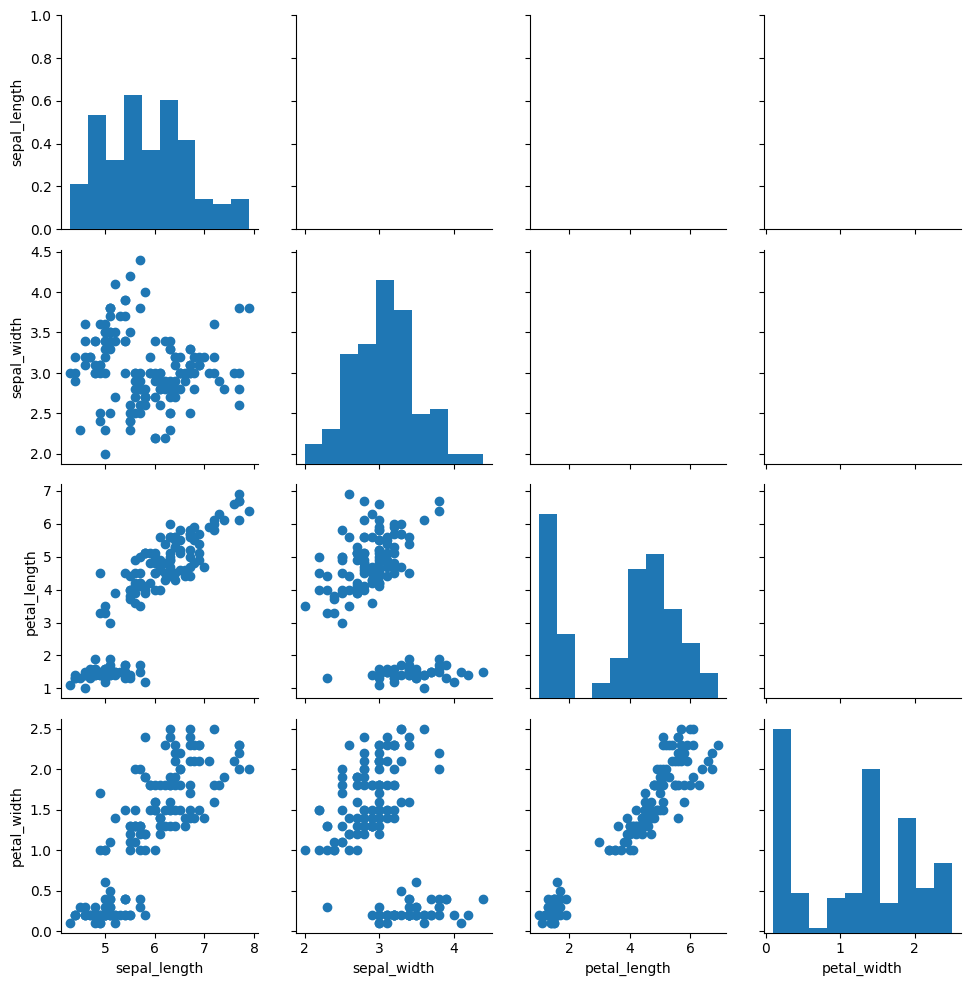

In [62]:
# mapping matplotlib's functions
grids = sns.PairGrid(iris)
grids.map_diag(plt.hist)
grids.map_lower(plt.scatter)

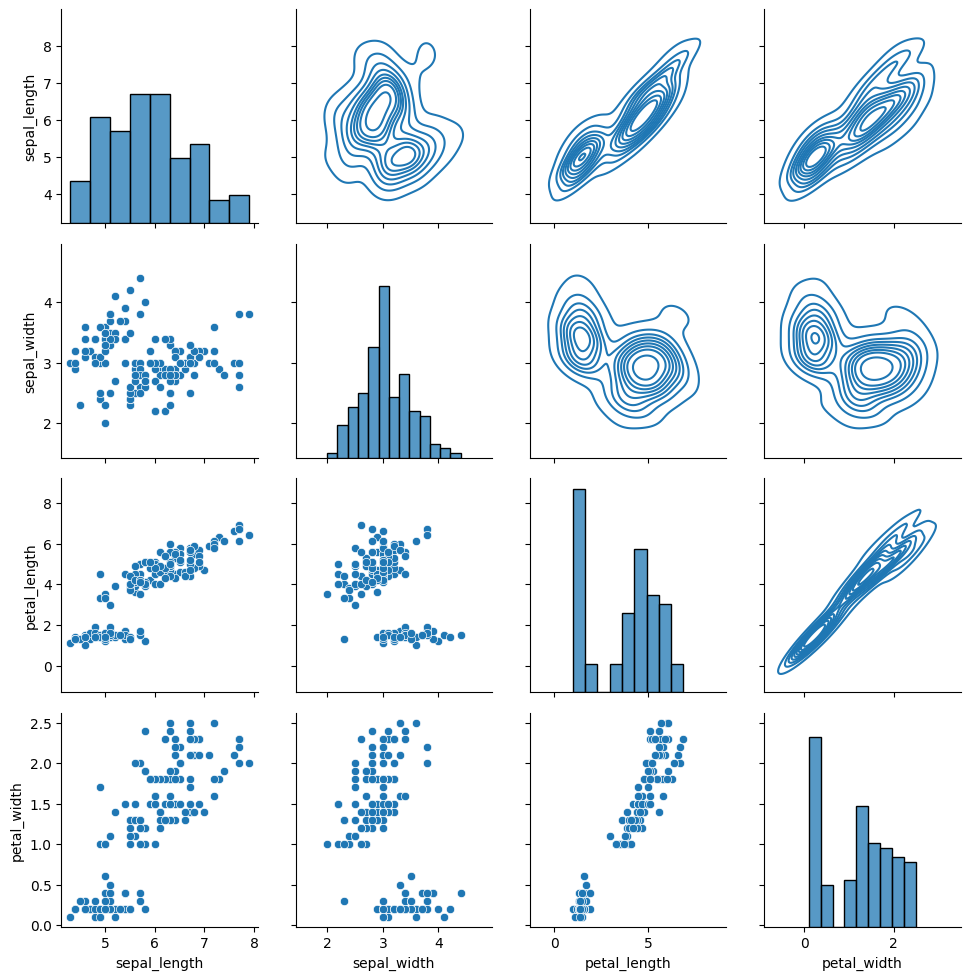

In [63]:
# mapping seaborn's functions
grids = sns.PairGrid(iris)
grids.map_diag(sns.histplot)
grids.map_lower(sns.scatterplot)
grids.map_upper(sns.kdeplot)

# Further case studies

In [64]:
# datasets
diamonds = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")
mpg = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv")
cars = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
arrests = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

## Encircling

Sometimes you want to show a group of points encircled by a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass them as (x, y) coordinates to the custom function `encircle()` that draws a convex hull.

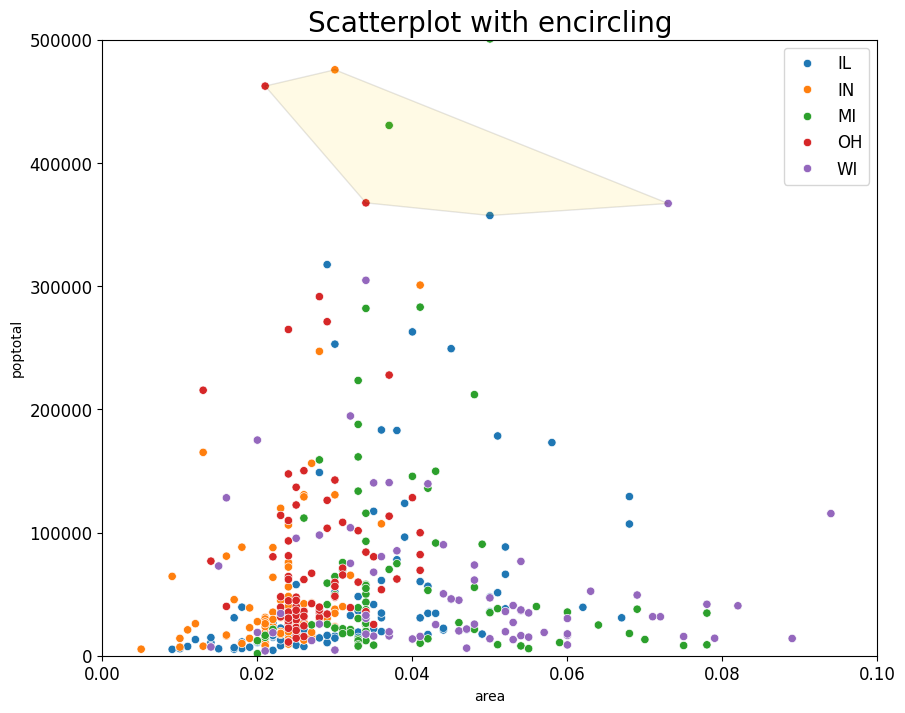

In [65]:
from matplotlib import patches
from scipy.spatial import ConvexHull

fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='area', y='poptotal', data=midwest, hue='state')

plt.xlim(0, 0.1)
plt.ylim(0, 5e5)

# Custom function that draws a polygon given some points as vertices
# src: https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
# see references below
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y] # similar to R's cbind()
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.query('poptotal > 350000 & poptotal < 5e5 & area > 0.01 & area < 0.1')
# equivalent:
# cond = (midwest.poptotal > 350000) & (midwest.poptotal < 5e5) & (midwest.area > 0.01) & (midwest.area < 0.1)
# midwest_encircle_data = midwest.loc[cond, :]

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot with encircling", fontsize=20)
plt.legend(fontsize=12)    
plt.show()   

For more information:
* [numpy.c_](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
* [scipy.spatial.ConvexHull](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html)

## Diverging bars

If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

[Example](https://drive.google.com/uc?export=view&id=1BFHIwEDJjEH4DBXWjmRvbIkH1lk7GwAW)

In [66]:
# data prep: compute z-values
df = cars.copy() ## why?
x = df.loc[:, ["mpg"]]
df["mpg_z"] = (x - x.mean()) / x.std()
df["colors"] = ["red" if x < 0 else "green" for x in df["mpg_z"]]
df.sort_values("mpg_z", inplace=True)
df.reset_index(inplace=True)  # reindex dataframe to keep sorting
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


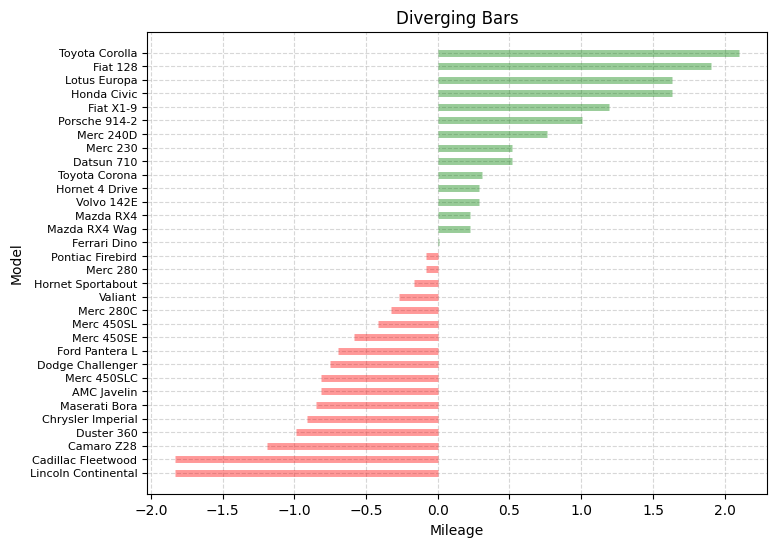

In [67]:
plt.figure(figsize=(8, 6))
# draw bars as thick horizontal lines
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# decorate
plt.yticks(df.index, df.cars, fontsize=8)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().set(xlabel="Mileage", ylabel="Model", title="Diverging Bars")
plt.show()

### Diverging texts

This is preferred if you want to show the value of each items within the chart.

[Example](https://drive.google.com/uc?export=view&id=1iKYdwcT5qdqQcupwHIVMhT5xLxQmtfRB)

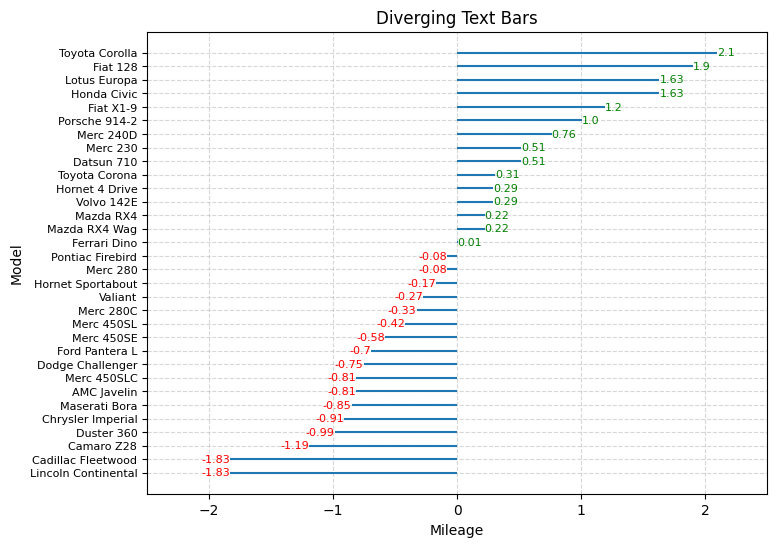

In [68]:
plt.figure(figsize=(8, 6))
# bars
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
# text annotations
for x, y in zip(df.mpg_z, df.index):
    t = plt.text(
        x,
        y,
        round(x, 2),
        va="center",
        ha="right" if x < 0 else "left",
        color="red" if x < 0 else "green",
        size=8,
    )

plt.yticks(df.index, df.cars, fontsize=8)
plt.grid(linestyle="--", alpha=0.5)
plt.xlim(-2.5, 2.5)  # add extra space to both ends
plt.gca().set(xlabel="Mileage", ylabel="Model", title="Diverging Text Bars")
plt.show()

### Diverging dot plot

In this plot, the absence of bars reduces the amount of contrast and disparity between the groups.

Here we also highlight two regions of the plot using shaded areas, which are drawn using matplotlib's `patches.Rectangle()`.

[Example](https://drive.google.com/uc?export=view&id=1b4HwhQYmjTzhVRDswjPzJvUA6oF17ZMX)

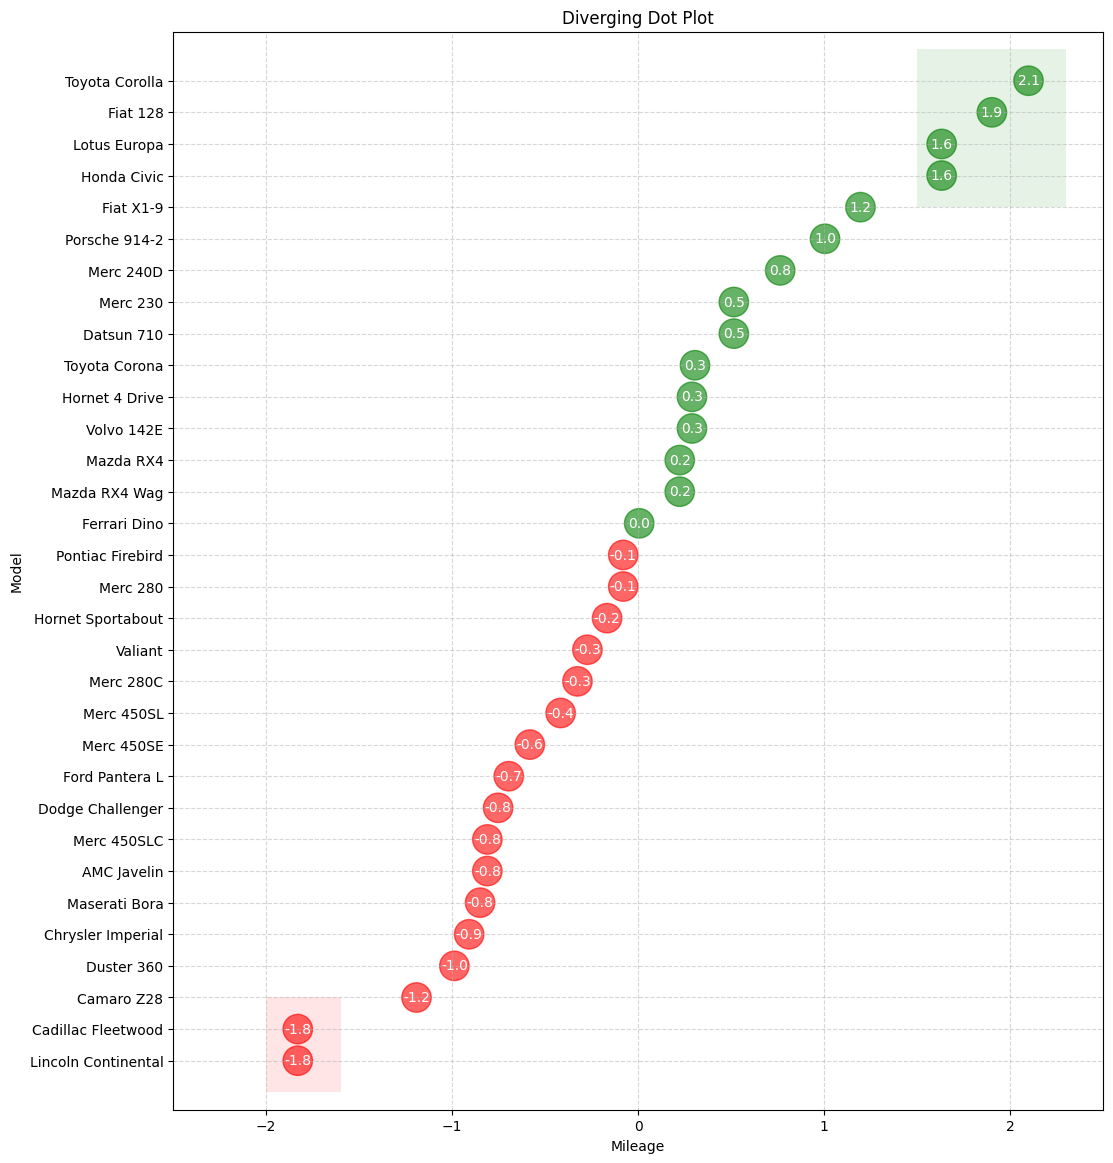

In [69]:
plt.figure(figsize=(12, 14))
# large points
plt.scatter(df.mpg_z, df.index, s=450, alpha=0.6, color=df.colors)

# text annotations
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(
        x,
        y,
        round(tex, 1),
        ha="center",
        va="center",
        color="white",
    )

# decorations
plt.yticks(df.index, df.cars)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().set(xlabel="Mileage", ylabel="Model", title="Diverging Dot Plot")
plt.xlim(-2.5, 2.5)

# shaded areas
p1 = patches.Rectangle(
    (1.5, 27), width=0.8, height=5, alpha=0.1, facecolor="green"
)  # 27 is the index of "Fiat X1-9"
p2 = patches.Rectangle((-2.0, -1), width=0.4, height=3, alpha=0.1, facecolor="red")
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

plt.show()

## Cleveland dot plot

A dot plot conveys the rank order of the items: since it is aligned along the horizontal axis, you can better visualize how far the points are from each other.

[Example](https://drive.google.com/uc?export=view&id=1NlOIZLlFFkko4zw02GYY4ff4ya61NFg9)

In [70]:
# Prepare Data
df_raw = mpg.copy()
# compute mean 'hwy' by manufacturer
df = df_raw[["hwy", "manufacturer"]].groupby("manufacturer").mean()
df.sort_values("hwy", inplace=True)
df.reset_index(inplace=True)
df.head()

,manufacturer,hwy
0,land rover,16.500000
1,lincoln,17.000000
2,jeep,17.625000
3,dodge,17.945946
4,mercury,18.000000


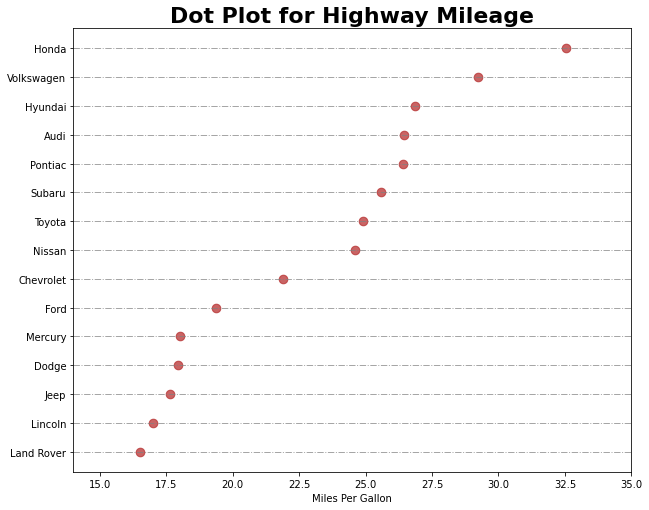

In [71]:
# define reasonable limits for x axis
x_min = round(df.hwy.min()) - 2
x_max = round(df.hwy.max()) + 2

# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)
# horizontal dashed lines
ax.hlines(
    y=df.index,
    xmin=x_min,
    xmax=x_max,
    color="gray",
    alpha=0.7,
    linewidth=1,
    linestyles="dashdot",
)
# data points
ax.scatter(y=df.index, x=df.hwy, s=75, color="firebrick", alpha=0.7)

# decorations
font = {
    "size": 22,
    "family": "sans-serif",
    "weight": "bold",
}  # use a font dict if you want to change multiple font properties at once
ax.set_title("Dot Plot for Highway Mileage", fontdict=font)
ax.set_xlabel("Miles Per Gallon")
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), ha="right")
ax.set_xlim(x_min, x_max)
plt.show()

# Ridgeline plot

Ridgeline plots (Joy plots) allow the density curves of different groups to overlap: they are a great way to visualize the distribution of a large number of groups in relation to each other. It looks pleasing to the eye and conveys just the right information clearly. It can be easily built using the `joypy` package which is based on matplotlib and pandas.

To install `joypy`:

```
!pip install joypy
```

In [72]:
# copy the above code here to install the package
!pip install joypy

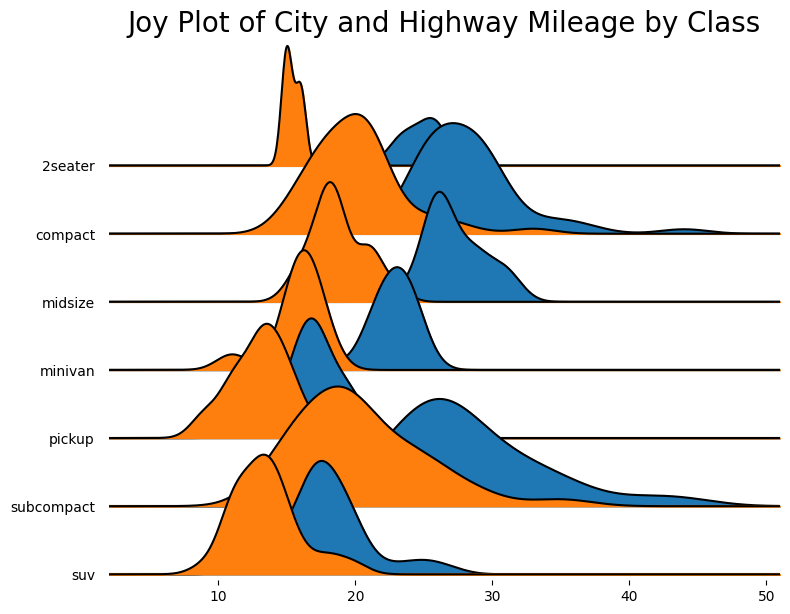

In [73]:
import joypy  # pip install joypy

# Draw Plot
fig, axes = joypy.joyplot(
    mpg, column=["hwy", "cty"], by="class", ylim="own", figsize=(8, 6)
)

# Decoration
plt.title("Joy Plot of City and Highway Mileage by Class", fontsize=20)
plt.show()

According to `pyjoy`'s Author...

> The R package ggridges (...) is much better developed/maintained than this one -- and I strongly suggest you use that if you can use R and ggplot.

# Waffle chart

Waffle charts show the compositions of groups in a larger population. Here we directly use the `pywaffle` package.

```
!pip install pywaffle
```

In [74]:
# copy the above code here to install the package
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pywaffle]1/2 [pywaffle]


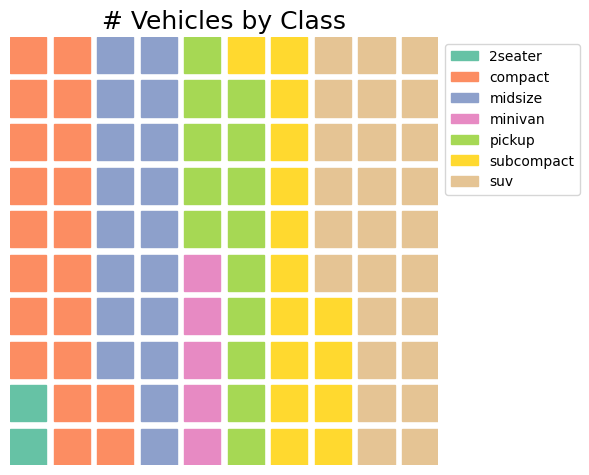

In [75]:
from pywaffle import Waffle

# data
df_raw = mpg.copy()

# compute the number of elements belonging to each "class"
df = df_raw.groupby("class").size().reset_index(name="counts")
# get the class labels
labels = df["class"].tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,
    values=df.counts,
    labels=labels,
    legend={"bbox_to_anchor": (1, 1)},
    title={"label": "# Vehicles by Class", "loc": "center", "fontsize": 18},
    figsize=(6, 6),
)

`pywaffle` allows you to add multiple waffle charts as subplots to the same figure. In this case, you need to merge the parameters for each plot as dict values and pass them to the argument `plots`. The keys of this dict are *integers* describing the position of the subplot, in the format `312`, standing for nrow, ncol, index.

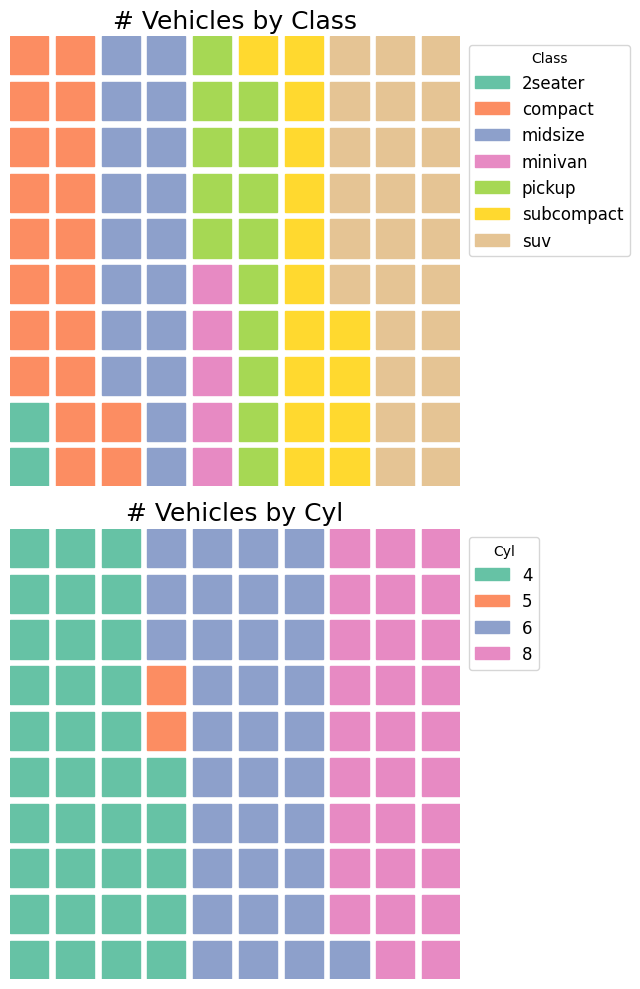

In [76]:
# Prepare distinct data frames to hold data for the different waffles
# By Class
df1 = df_raw.groupby("class").size().reset_index(name="counts")

# By Cylinders
df2 = df_raw.groupby("cyl").size().reset_index(name="counts")

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            "values": df1.counts,
            "labels": df1["class"].tolist(),
            "legend": {"bbox_to_anchor": (1, 1), "fontsize": 12, "title": "Class"},
            "title": {"label": "# Vehicles by Class", "loc": "center", "fontsize": 18},
        },
        212: {
            "values": df2.counts,
            "labels": df2["cyl"].tolist(),
            "legend": {"bbox_to_anchor": (1, 1), "fontsize": 12, "title": "Cyl"},
            "title": {"label": "# Vehicles by Cyl", "loc": "center", "fontsize": 18},
        },
    },
    rows=10,
    columns=10,
    # cmap_name="Accent",
    figsize=(10, 10),
)

# Treemap

Treemaps are similar to pie charts: they do a better job without misleading the contributions by each group. In the below example, we use the Python module `squarify`.

In [77]:
!pip install squarify

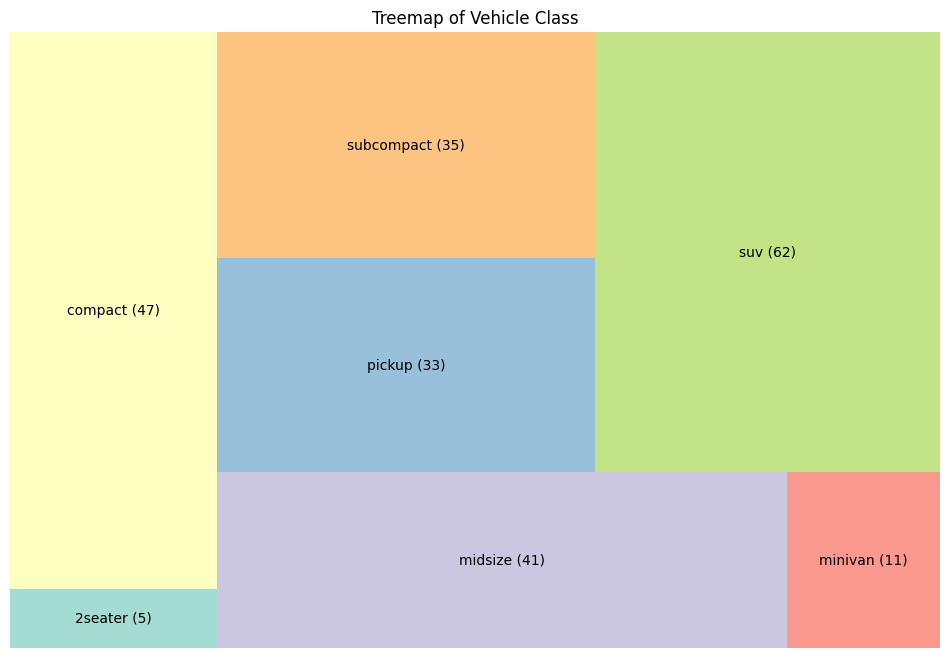

In [78]:
import squarify

# Import
df_raw = mpg.copy()

# compute the number of elements belonging to each "class"
df = df_raw.groupby("class").size().reset_index(name="counts")
n_categories = df.shape[0]

# create labels as "class name (class count)"
labels = df.apply(lambda x: f"{x.iloc[0]} ({x.iloc[1]})", axis=1)
sizes = df["counts"].tolist()
# create n_categories unique colors
colors = plt.cm.Set3(range(n_categories))

# draw plot
plt.figure(figsize=(12, 8))

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

# decorate
plt.title("Treemap of Vehicle Class")
plt.axis("off")
plt.show()

The following example shows a little more customization (larger text, padding):

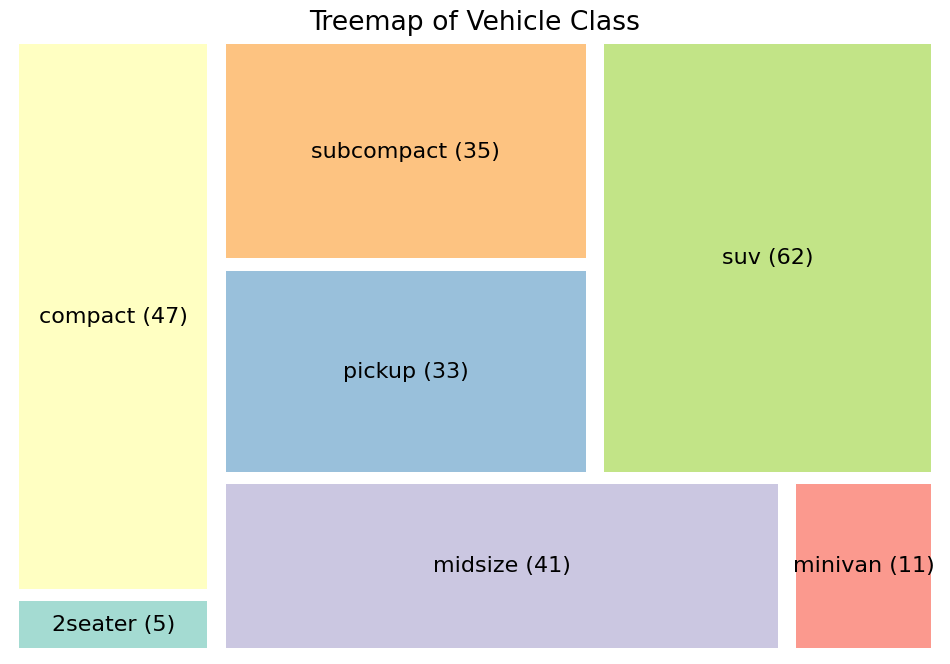

In [79]:
plt.figure(figsize=(12, 8))

with mpl.rc_context({"font.size": 16}):  # temporarily change rcParams
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, pad=True)
    plt.title("Treemap of Vehicle Class")

plt.axis("off")
plt.show()

# Cluster Plot

Cluster plots can be used to demarcate points that belong to the same cluster. Below is a representational example to group the US states into 5 groups based on the USArrests dataset. This cluster plot uses the `murder` and `assault` columns as X and Y axis. Alternatively, you can use the first two principal components as the X and Y axis.

In [80]:
!pip install scikit-learn --upgrade

  Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.2 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


# Andrews plot
The Andrews plot (or Andrews curve) helps visualize if there are inherent groupings of the numerical features based on a given stratifying variable. Andrews curves are a projection of multivariate data into a 2D space: **each observation is represented by a curve.** If two curves are close to each other, then the corresponding observations are also close. Note that **the actual shape of the curve tells you nothing**.

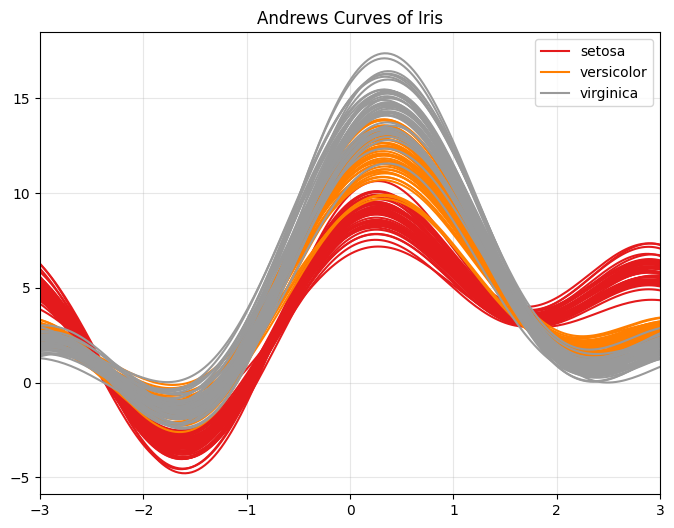

In [81]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(8, 6))
andrews_curves(iris, "species", colormap="Set1")

# decorations
plt.title("Andrews Curves of Iris")
plt.xlim(-3, 3)
plt.grid(alpha=0.3)
plt.show()

Setosa appears quite distinct from the other two sets of lines, which considerably overlap. This is consistent with our previous observations on the Iris data set.

# Parallel Coordinates

Similarly to Andrews plots, parallel coordinates helps to visualize if a feature segregates the groups effectively.

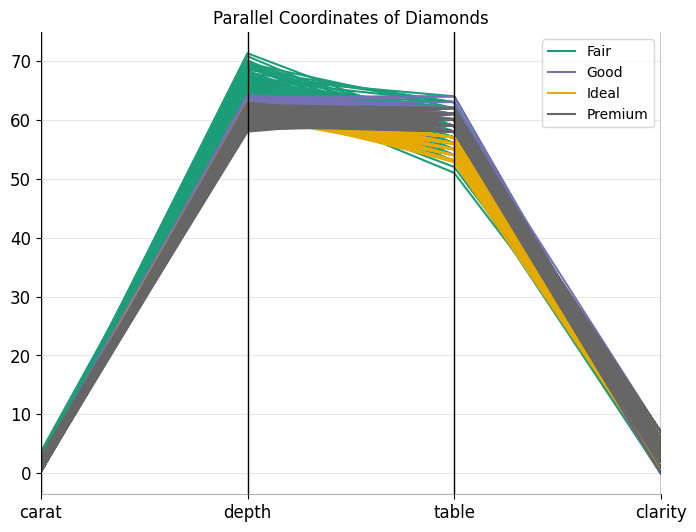

In [82]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8, 6))

parallel_coordinates(diamonds, "cut", colormap="Dark2")

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(0.3)

plt.title("Parallel Coordinates of Diamonds")
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Exercise

Write a function that given a dataset, what will be on the x and y axis, and what the coloring groups should be, plot such data using a barplot.
Moreover, whether to do a pair t-test or an unpaired t-test should also be an input.
The labels to use in these t-tests follow the following convention:
- p > 0.05 -> n.s
- p < 0.05 -> *
- p < 0.01 -> **
- p < 0.001 --> ***

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

def bar_plotting(df, x_features, x_labels, y_label, coloringGroups, isPair_t_test=False):
    # convert to long format in order to plot
    df_melted = df.melt(id_vars=coloringGroups, value_vars=x_features,
                        var_name='feature', value_name='value')

    # plotting

    # setting ordering to be used also for annotation plotting
    unique_groups = sorted(df[coloringGroups].unique())
    group1_label, group2_label = unique_groups
    ax = sns.barplot(
        data=df_melted, x='feature', y='value', hue=coloringGroups,
        hue_order=unique_groups, estimator='mean', errorbar='ci', 
        err_kws={'linewidth': 0.7}, capsize=0.1
    )

    # compute confidence interval (95%) as these values will be used to determine the starting
    # point of the annotation lines
    ci_data = df_melted.groupby(['feature', coloringGroups])['value'].agg(['mean', 'count', 'std']).reset_index()
    ci_data['ci'] = 1.96 * ci_data['std'] / (ci_data['count']**0.5) # formula from the web

    # t-score can be done only if exactly 2 groups are present
    if len(unique_groups) == 2:
        group1_label, group2_label = unique_groups

        # sort groups by coloringGroups to avoid ambiguity
        # otherwise we might end up by putting the "lines" to the wrong bar
        group1_data = ci_data[ci_data[coloringGroups] == group1_label].sort_values(by='feature')
        group2_data = ci_data[ci_data[coloringGroups] == group2_label].sort_values(by='feature')

        for i, feature in enumerate(x_features):
            ci1 = group1_data[group1_data['feature'] == feature].iloc[0]
            ci2 = group2_data[group2_data['feature'] == feature].iloc[0]

            # this is where the error bar "finishes" for each bar
            upper1 = ci1['mean'] + ci1['ci']
            upper2 = ci2['mean'] + ci2['ci']
            bar_height = max(upper1, upper2)

            # add extra space to avoid touching the CI error bar
            spacing = 1
            line_height = bar_height + spacing
            text_height = line_height

            # set proper horizontal line length
            x1 = i - 0.2 
            x2 = i + 0.2

            # draw vertical lines for each group
            ax.plot([x1, x1], [upper1 + 0.3, line_height], c="black")
            ax.plot([x2, x2], [upper2 + 0.3, line_height], c="black")
            ax.plot([x1, x2], [line_height, line_height], lw=1, c='black')

            # compute t-test
            group1_values = df[df[coloringGroups] == group1_label][feature].dropna().reset_index(drop=True)
            group2_values = df[df[coloringGroups] == group2_label][feature].dropna().reset_index(drop=True)

            if isPair_t_test and len(group1_values) == len(group2_values):
                stat, p = ttest_rel(group1_values, group2_values)
            else:
                stat, p = ttest_ind(group1_values, group2_values, equal_var=False)

            # set annotation label
            if p > 0.05:
                annotation = "p = " + str(round(p, 2))
            elif p <= 0.001:
                annotation = "***"
            elif p <= 0.01:
                annotation = "**"
            elif p <= 0.05:
                annotation = "*"

            ax.text(i, text_height, annotation, ha='center', va='bottom', fontsize=10)

    ax.set_ylabel(y_label)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel(None)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_7060/3941584139.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ci_data = df_melted.groupby(['feature', coloringGroups])['value'].agg(['mean', 'count', 'std']).reset_index()
/tmp/ipykernel_7060/3941584139.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


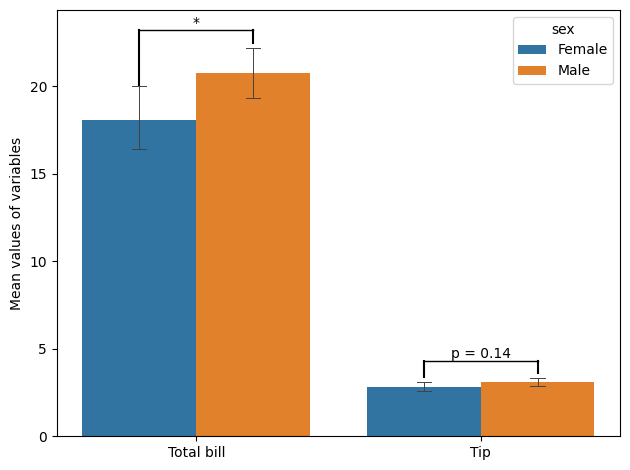

In [84]:
tips = sns.load_dataset("tips")

bar_plotting(
    df=tips,
    x_features=["total_bill", "tip"],
    x_labels=["Total bill", "Tip"],
    y_label="Mean values of variables",
    coloringGroups="sex",
    isPair_t_test=False
)

/tmp/ipykernel_7060/3941584139.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


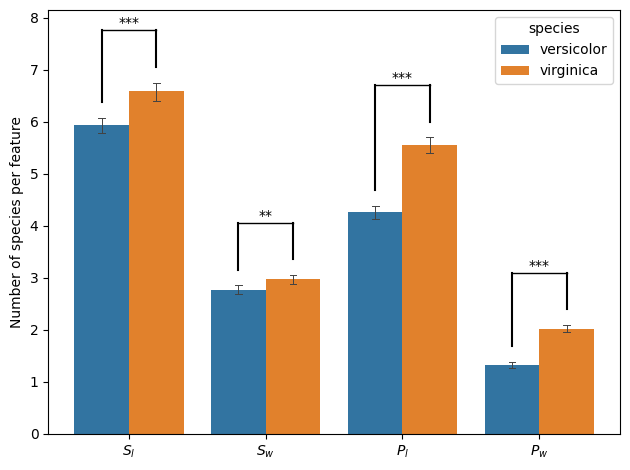

In [85]:
# in this case it is not possible to annotate the plot as the t-score
# can be computed only having 2 "groups"
# we need to drop one specie 

iris = sns.load_dataset("iris")
iris = iris[iris.species != 'setosa']

bar_plotting(
    df=iris,
    x_features=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    x_labels=[r"$S_l$", r"$S_w$",r"$P_l$", r"$P_w$"],
    y_label="Number of species per feature",
    coloringGroups="species",
    isPair_t_test=False
)